<a href="https://colab.research.google.com/github/adhang/learn-data-science/blob/main/LendingClub_Loan_Credit_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LendingClub - Loan Credit Prediction

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

# Libraries

## Installing Libraries

In [ ]:
# !pip install inflection
# !pip install dython
# !pip install missingno

# !pip install --upgrade pandas
# !pip install --upgrade numpy
# ! pip install --upgrade scikit-learn
# !pip install --upgrade scipy
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn

## Importing Libraries

In [ ]:
# data manipulation
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# missing values
import missingno as msno

# CamelCase to snake_case
import inflection

# association between attributes
from dython.nominal import associations

# word cloud
from wordcloud import WordCloud, STOPWORDS

# Dataset Overview

## Reading Dataset

In [ ]:
path = '/content/drive/MyDrive/My Projects/2022/Internship - id x partners/dataset/loan_data_2007_2014.csv'

data = pd.read_csv(path, dtype={'desc':str})
data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0        9.0                   f        0.0            0.0     5861.071   
1        4.0                   f        0.0            0.0     1008.710   
2       10.0                   f        0.0            0.0     3003.654   
3       37.0                   f        0.0            0.0    12226.302   
4       38.0                   f      766.9          766.9     3242.170   

   total_pymnt_

The first column (`Unnamed: 0`) is just like an index, so I'll drop it.

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0        9.0                   f        0.0            0.0     5861.071   
1        4.0                   f        0.0            0.0     1008.710   
2       10.0                   f        0.0            0.0     3003.654   
3       37.0                   f        0.0            0.0    12226.302   
4       38.0                   f      766.9          766.9     3242.170   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.0

## Duplicated Values

In [ ]:
data.duplicated().sum()

0

There's no duplicated value, good start.

## Data Types

### Numeric

In [ ]:
data.select_dtypes(include=np.number).head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0  1077501    1296599       5000         5000           4975.0     10.65   
1  1077430    1314167       2500         2500           2500.0     15.27   
2  1077175    1313524       2400         2400           2400.0     15.96   
3  1076863    1277178      10000        10000          10000.0     13.49   
4  1075358    1311748       3000         3000           3000.0     12.69   

   installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  \
0       162.87     24000.0  27.65          0.0             1.0   
1        59.83     30000.0   1.00          0.0             5.0   
2        84.33     12252.0   8.72          0.0             2.0   
3       339.31     49200.0  20.00          0.0             1.0   
4        67.79     80000.0  17.94          0.0             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   
3                    35.0                     NaN      10.0      0.0   
4                    38.0                     NaN      15.0      0.0   

   revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
0      13648        83.7        9.0        0.0            0.0     5861.071   
1       1687         9.4        4.0        0.0            0.0     1008.710   
2       2956        98.5       10.0        0.0            0.0     3003.654   
3       5598        21.0       37.0        0.0            0.0    12226.302   
4      27783        53.9       38.0      766.9          766.9     3242.170   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                0.00   
1          1008.71           456.46         435.17                0.00   
2          3003.65          2400.00         603.65                0.00   
3         12226.30         10000.00        2209.33               16.97   
4          3242.17          2233.10        1009.07                0.00   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0        0.00                     0.00           171.62   
1      117.08                     1.11           119.66   
2        0.00                     0.00           649.91   
3        0.00                     0.00           357.48   
4        0.00                     0.00            67.79   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN            1   
1                         0.0                          NaN            1   
2                         0.0                          NaN            1   
3                         0.0                          NaN            1   
4                         0.0                          NaN            1   

   annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  \
0               NaN        NaN                        NaN             0.0   
1               NaN        NaN                        NaN             0.0   
2               NaN        NaN                        NaN             0.0   
3               NaN        NaN                        NaN             0.0   
4               NaN        NaN                        NaN             0.0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  \
0           NaN          NaN          NaN         NaN          NaN   
1           NaN          NaN          NaN         NaN          NaN   
2           NaN          NaN          NaN         NaN          NaN   
3           NaN          NaN          NaN         NaN          NaN   
4           NaN          NaN          NaN         NaN          NaN   

   open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  \
0          NaN                 NaN         

### Categorical

In [ ]:
data.select_dtypes(exclude=np.number).head()

term grade sub_grade                 emp_title emp_length  \
0   36 months     B        B2                       NaN  10+ years   
1   60 months     C        C4                     Ryder   < 1 year   
2   36 months     C        C5                       NaN  10+ years   
3   36 months     C        C1       AIR RESOURCES BOARD  10+ years   
4   60 months     B        B5  University Medical Group     1 year   

  home_ownership verification_status issue_d  loan_status pymnt_plan  \
0           RENT            Verified  Dec-11   Fully Paid          n   
1           RENT     Source Verified  Dec-11  Charged Off          n   
2           RENT        Not Verified  Dec-11   Fully Paid          n   
3           RENT     Source Verified  Dec-11   Fully Paid          n   
4           RENT     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state earliest_cr_line  \
0              Computer    860xx         AZ           Jan-85   
1                  bike    309xx         GA           Apr-99   
2  real estate business    606xx         IL           Nov-01   
3              personel    917xx         CA           Feb-96   
4              Personal    972xx         OR           Jan-96   

  initial_list_status last_pymnt_d next_pymnt_d last_credit_pull_d  \
0                   f       Jan-15          NaN             Jan-16   
1                   f       Apr-13          NaN             Sep-13   
2                   f       Jun-14          NaN             Jan-16   
3                   f       Jan-15          NaN             Jan-15   
4                   f       Jan-16       Feb-16             Jan-16   

  application_type  
0       INDIVIDUAL  
1       INDIVIDUAL  
2       INDIVIDUAL  
3       INDIVIDUAL  
4       INDIVIDUAL

## Missing Values

### Tabular

In [ ]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

### Bar Plot

<AxesSubplot:>

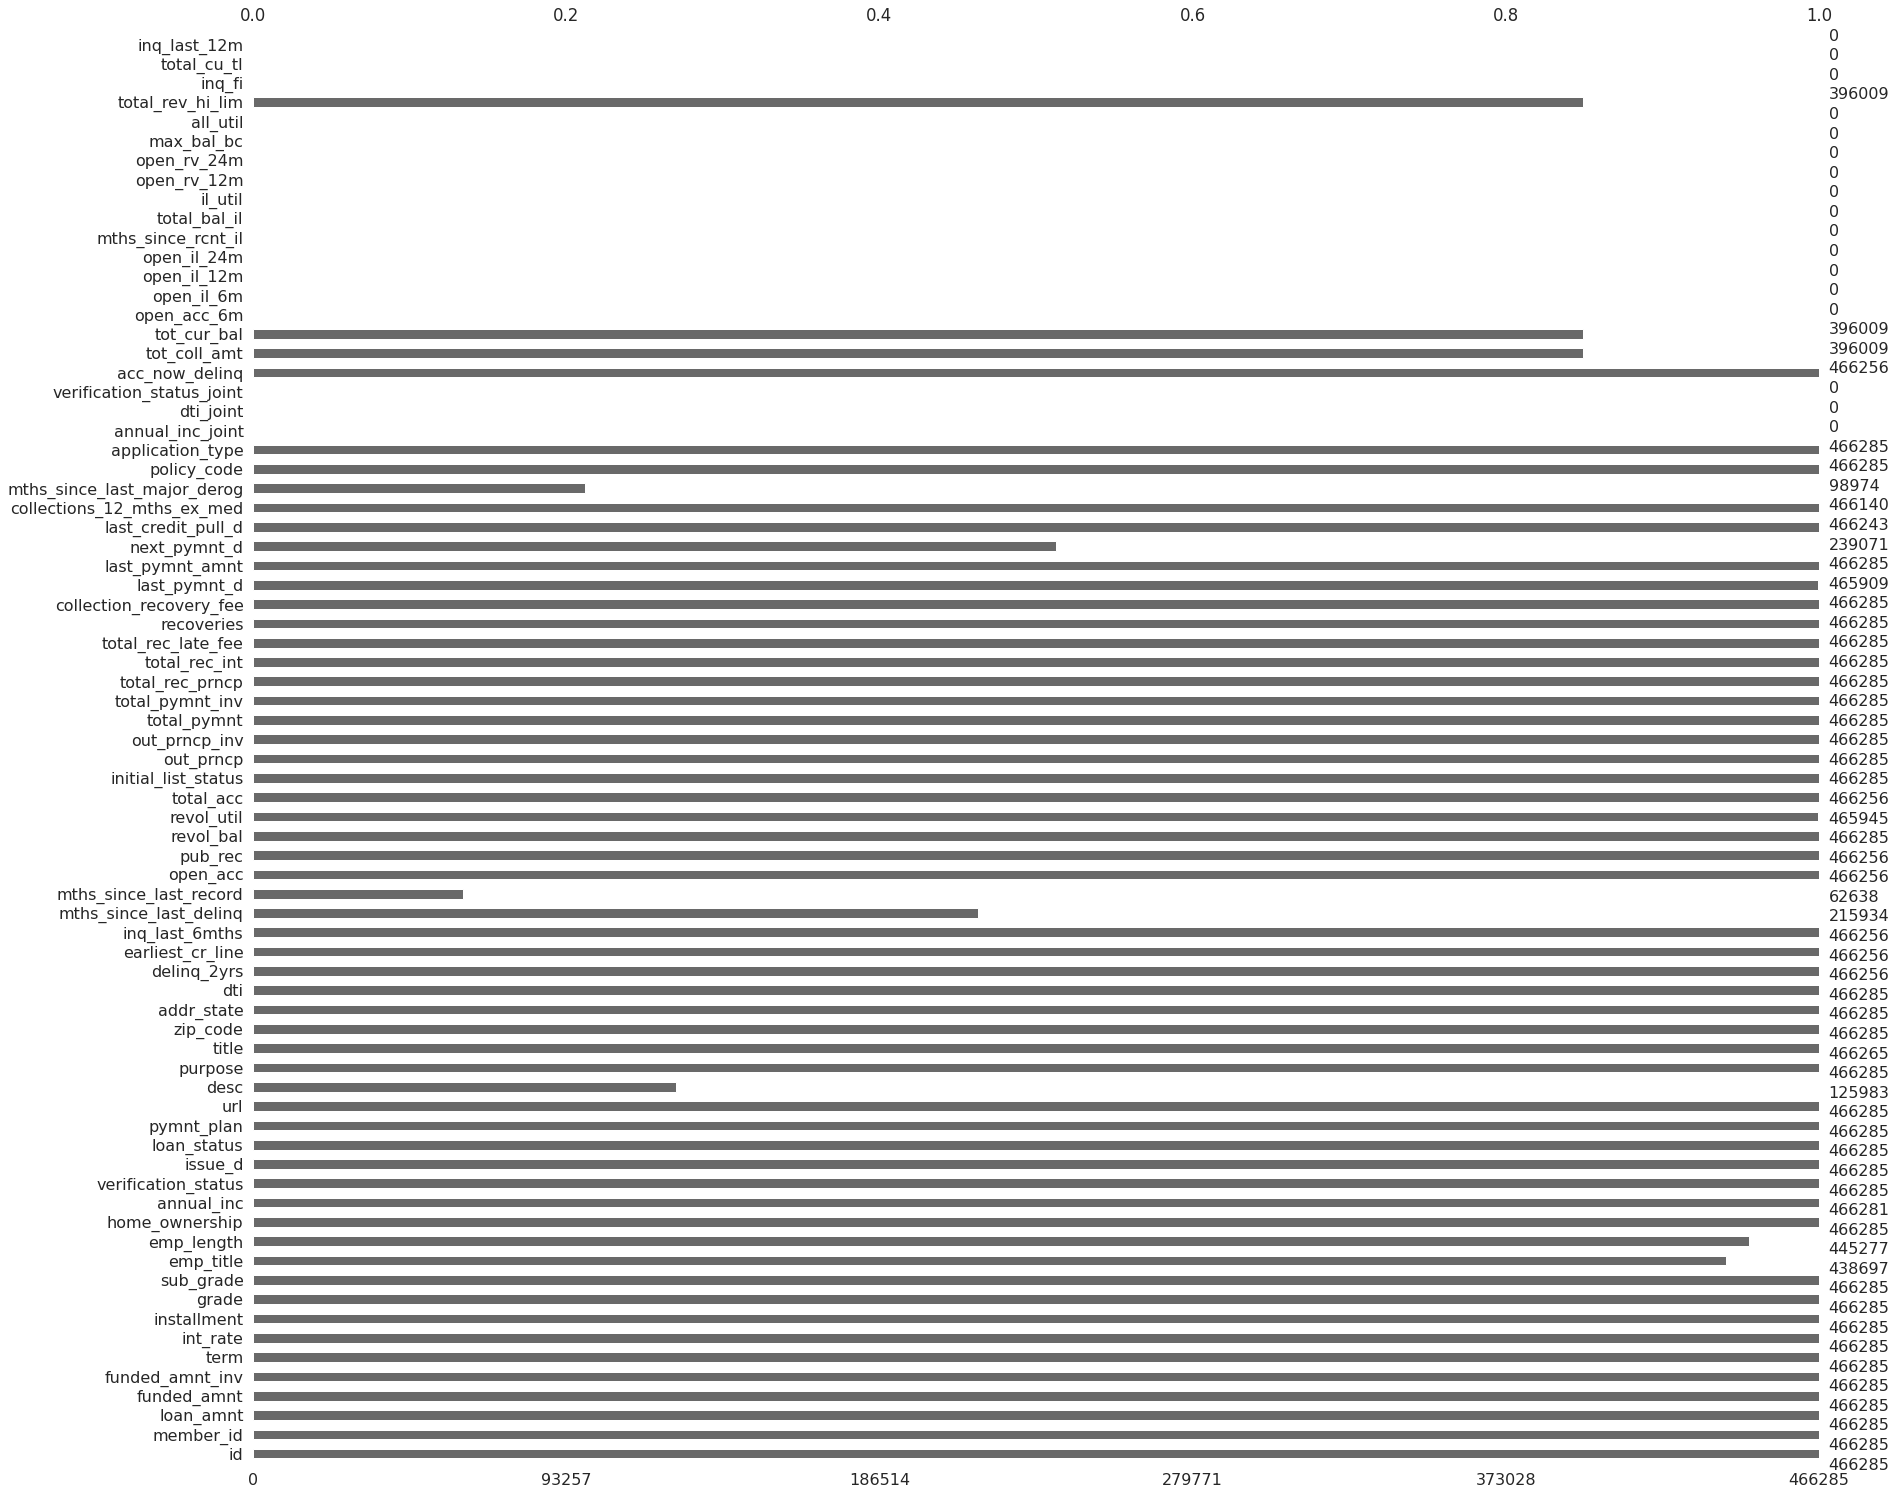

In [ ]:
msno.bar(data)

As we can see, there are some columns that have pretty much missing values. Moreover, some columns contain only missing values.

### Correlation Heatmap

The `missingno` correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.
<br><br>

Nullity correlation ranges from `-1` (if one variable appears the other definitely does not) to `0` (variables appearing or not appearing have no effect on one another) to `1` (if one variable appears the other definitely also does).
<br><br>

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization.
<br><br>

Source: [missingno documentation](https://github.com/ResidentMario/missingno)

<AxesSubplot:>

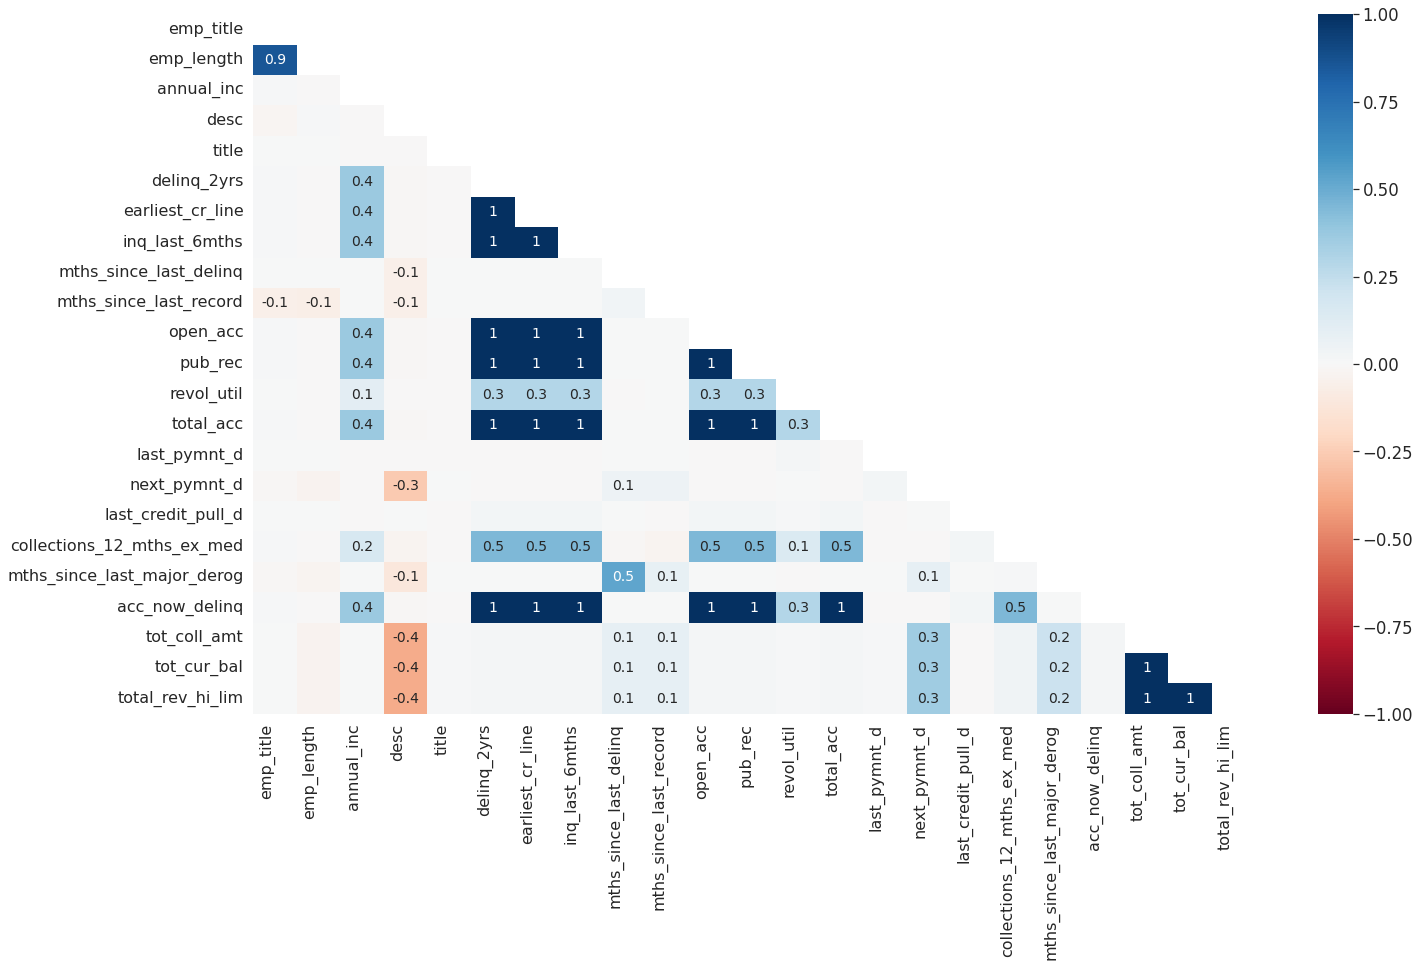

In [ ]:
msno.heatmap(data, label_rotation=90)

- In this dataset, we can see that there are many columns that have perfect correlation (correlation = 1). For example, it seems that if the `tot_rev_hi_lim` is null, then the `total_coll_amt` and `tot_cur_bal` are null too.
- Employment title (`emp_title`) and employment lenght (`emp_length`) have high correlation, but not perfect. We can recheck those columns.

### Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.
<br><br>

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.
<br><br>

Source: [missingno documentation](https://github.com/ResidentMario/missingno)

<AxesSubplot:>

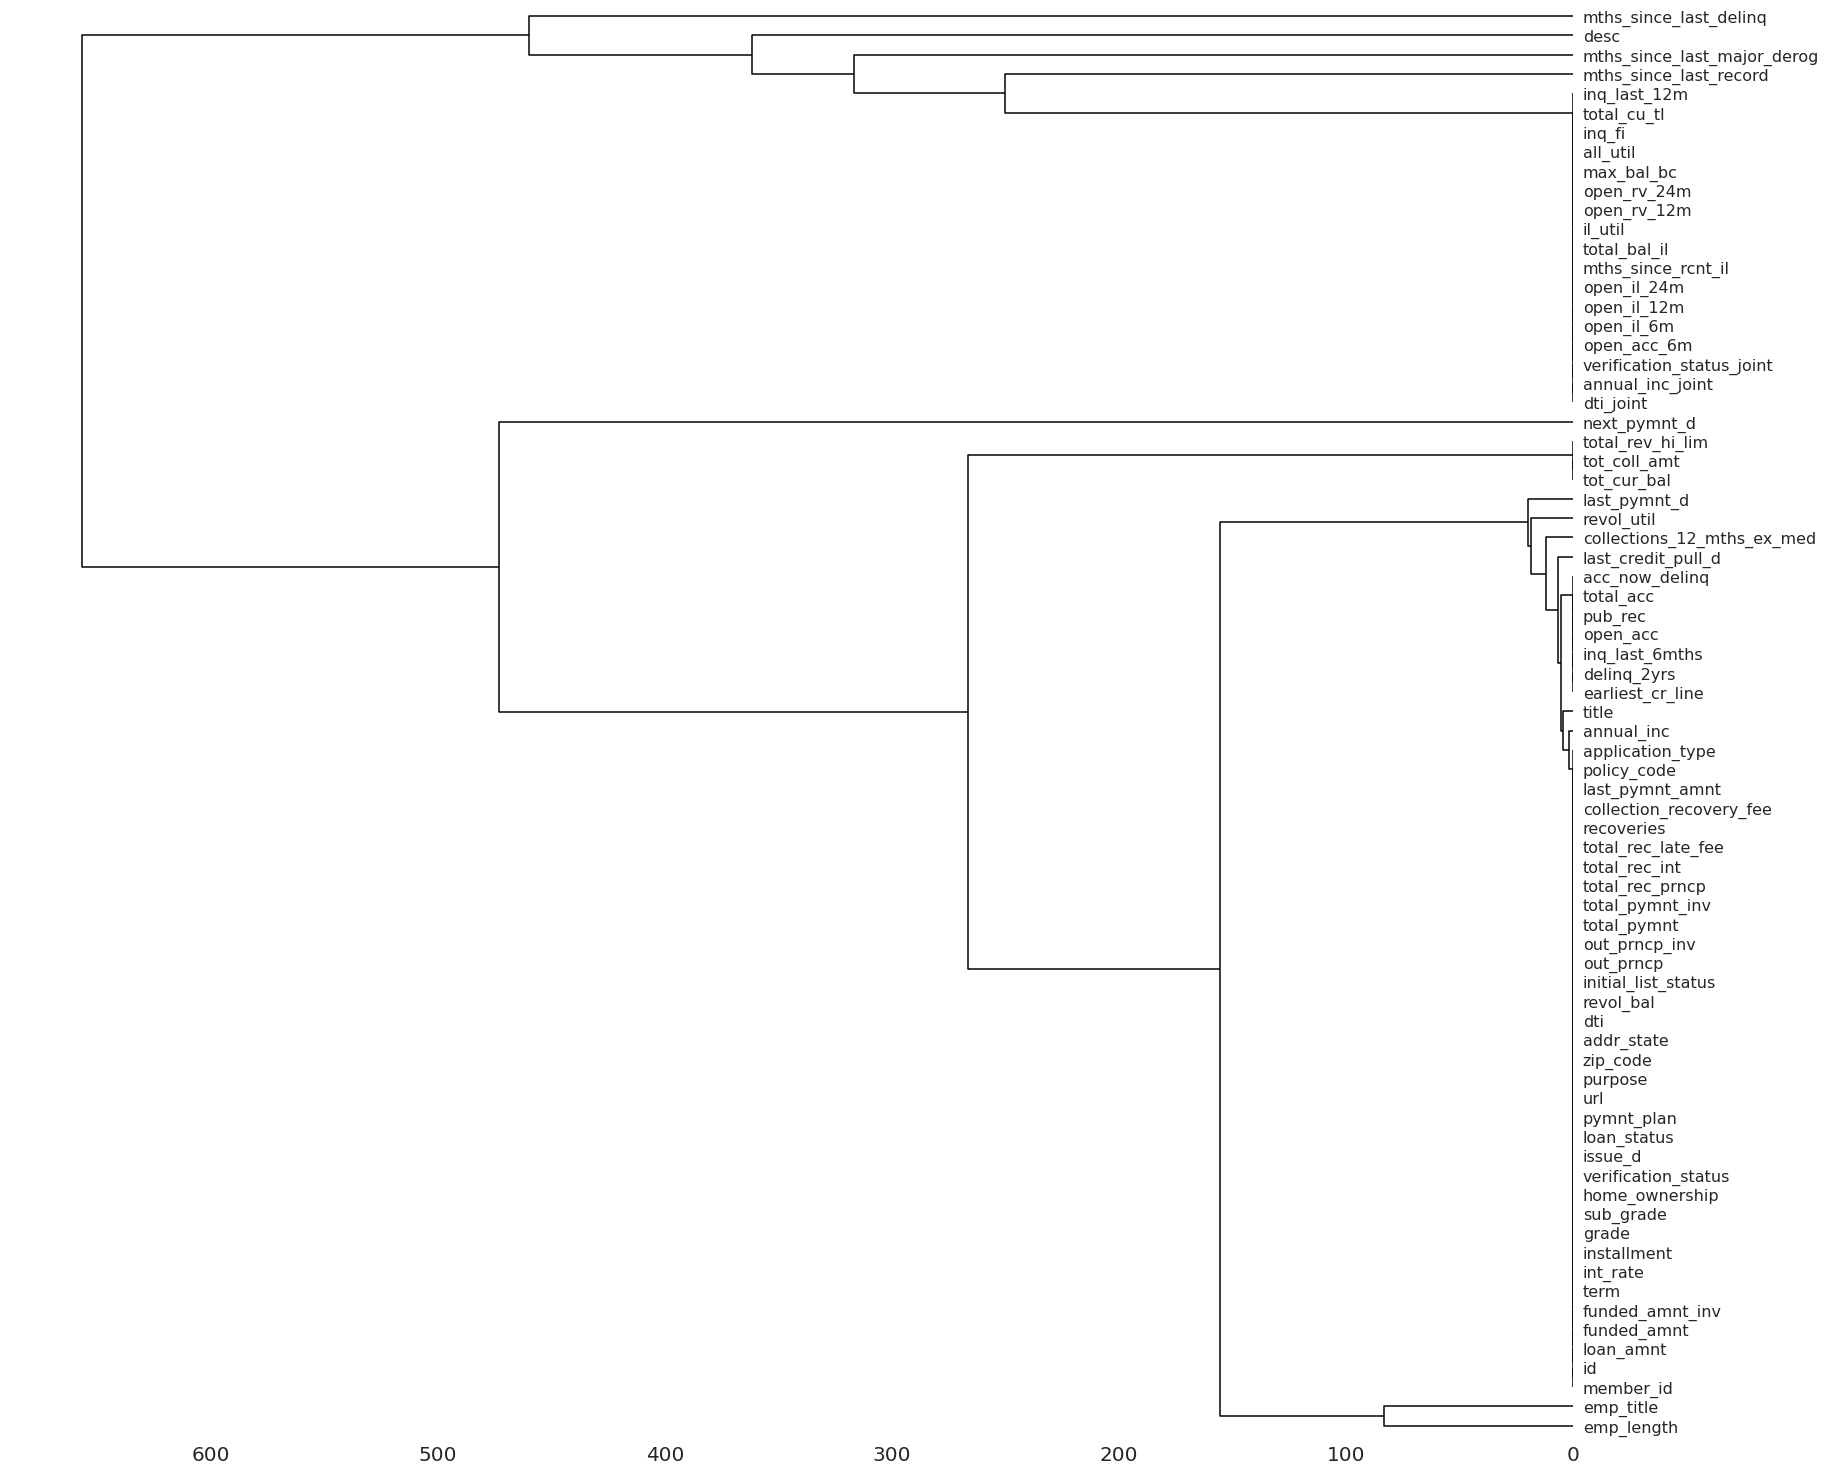

In [ ]:
msno.dendrogram(data)

### Missing Values Location

<AxesSubplot:>

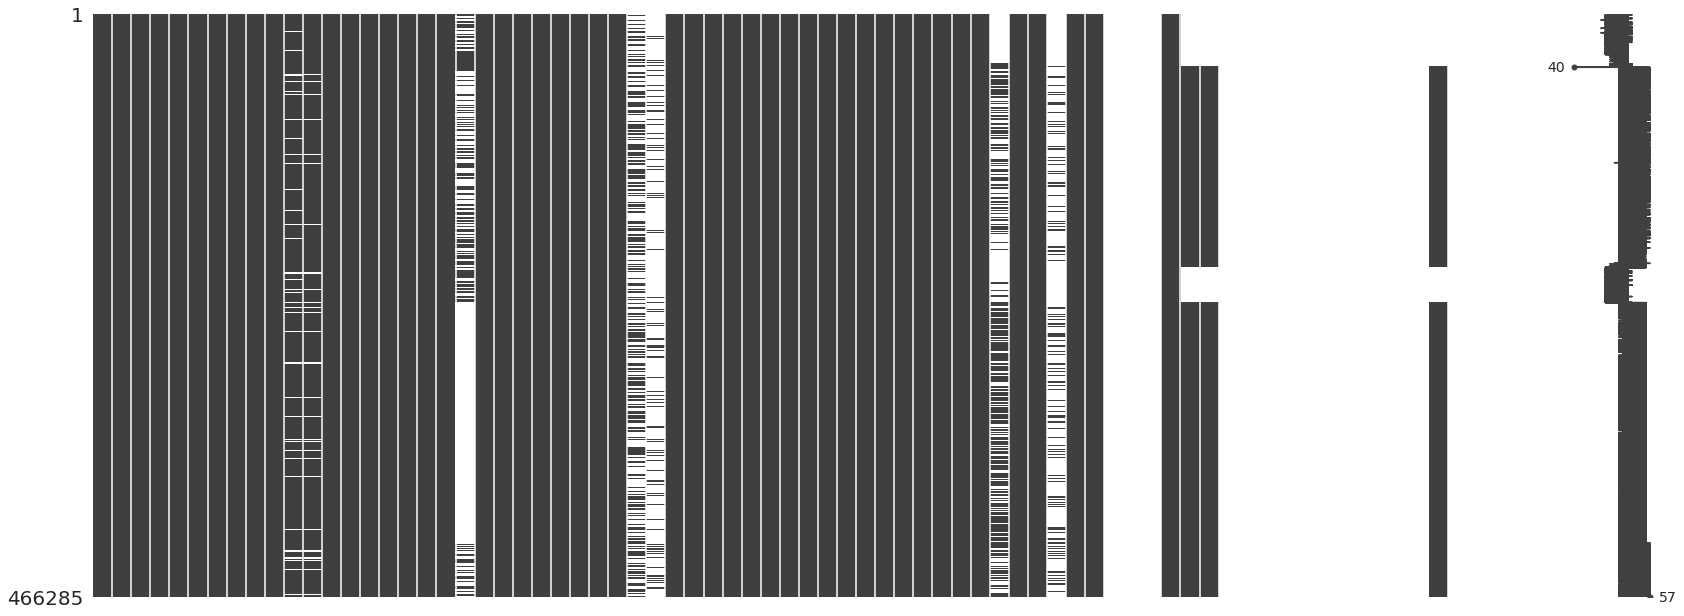

In [ ]:
msno.matrix(data)

## Dropping Columns with Many Missing Values

Up to now, I still don't know the right 'rule' about the tolerance of missing values. If you have any clue, please tell me.
<br><br>
So, for this project, I will just drop some columns with missing values of more than 40%. 

### Dropping Columns

In [ ]:
data.shape

(466285, 74)

In [ ]:
mask = data_null['percentage_null'] > 40
column_null = data_null.loc[mask].index.tolist()

data.drop(columns=column_null, inplace=True)
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0          0.0           Jan-85             1.0       3.0      0.0      13648   
1          0.0           Apr-99             5.0       3.0      0.0       1687   
2          0.0           Nov-01             2.0       2.0      0.0       2956   
3          0.0           Feb-96             1.0      10.0      0.0       5598   
4          0.0           Jan-96             0.0      15.0      0.0      27783   

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        83.7        9.0                   f        0.0            0.0   
1         9.4        4.0                   f        0.0            0.0   
2        98.5       10.0                   f        0.0            0.0   
3        21.0       37.0                   f        0.0            0.0   
4        53.9       38.0                   f      766.9          766.9   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0     5861.071          5831.78          5000.00         861.07   
1     1008.710          1008.71           456.46         435.17   
2     3003.654          3003.65          2400.00         603.65   
3    12226.302         12226.30         10000.00        2209.33   
4     3242.170          3242.17          2233.10        1009.07   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       Jan-16   

   

### Update Missing Value List

In [ ]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

In [ ]:
data.shape

(466285, 52)

I have deleted 22 columns. Now, the highest column that has missing values is only 15%.

In [ ]:
mask = data_null['total_null'] != 0
column_null = data_null[mask].index.tolist()
column_null

['emp_title',
 'emp_length',
 'annual_inc',
 'title',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

# Exploratory Data Analysis

## Visualization Function

### Stacked Bar Plot

In [ ]:
def stacked_bar_plot(data, x, y, orient='horizontal', 
                     ax=None, show=True, annot=True, sortby='values', 
                     title=None, index_type=None, color=['#FC4F30', '#008FD5']):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create specific color
  if color == 'single':
    color = ['#FC4F30', '#C2C2C2']

  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['Bad', 'Good'], axis=1)
  if index_type != None:
    crosstab.index = crosstab.index.astype(index_type)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    if sortby == 'index':
      crosstab = crosstab.sort_index(ascending=True)
    else:
      crosstab = crosstab.sort_values('Bad', ascending=False)
    crosstab.plot(kind='bar', stacked=True, color=color, ax=ax)

    # add percentage label
    if annot:
      for i, index in enumerate(crosstab.index):
          for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
            ax.text(x=i,
                    y=(y_loc - proportion) + (proportion / 2),
                    s=f'{proportion*100:.1f}%',
                    color='white',
                    fontsize=14,
                    fontweight='bold',
                    horizontalalignment='center',
                    verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    if sortby == 'index':
      crosstab = crosstab.sort_index(ascending=False)
    else:
      crosstab = crosstab.sort_values('Bad', ascending=True)
    crosstab.plot(kind='barh', stacked=True, color=color, ax=ax)

    # add percentage label
    if annot:
      for i, index in enumerate(crosstab.index):
          for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
            ax.text(y=i,
                    x=(x_loc - proportion) + (proportion / 2),
                    s=f'{proportion*100:.1f}%',
                    color='white',
                    fontsize=14,
                    fontweight='bold',
                    horizontalalignment='center',
                    verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  if title == None:
    x_titleize = inflection.titleize(x)
    ax.set_title(f'Loan Credit Risk Probability by {x_titleize}')
  else:
    ax.set_title(title)
    
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

### Wordcloud

In [ ]:
def wordcloud_plot(wordcloud, title):
  _, ax = plt.subplots(figsize=(12,8))

  ax.imshow(wordcloud)
  ax.axis('off')
  ax.set_title(title, size=24, fontweight='bold', pad=20)

  plt.show()

### KDE Probability Plot

In [ ]:
def kde_proba_plot(data, x, hue, ax=None, show=True, xticks_step=100):
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  ax.grid(False, axis='x')

  sns.kdeplot(data=data, x=x, hue=hue, multiple='fill', linewidth=3, ax=ax, alpha=0.9)
  sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

  ax.set_xticks(np.arange(0, data[x].max(), xticks_step))
  ax.set_xlim(data[x].min(), data[x].max())

  ax.set_yticks(np.linspace(0,1,5))
  ax.set_ylabel('probability')

  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

## Target Variable

### Identifying Target Variable

This dataset information doesn't give an explicit information about its target variable. After reading all of the provided attribute information, I end up in a conclusion: The target variable is the loan status.

In [ ]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

As shown above, the loan status has many categories.
<br><br>

Based on [LendingClub](https://help.lendingclub.com/hc/en-us/articles/216109367-What-do-the-different-Note-statuses-mean-), the definition of each status is:
- `Fully Paid`: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
- `Current`: Loan is up to date on all outstanding payments.
- `In Grace Period`: Loan is past due but within the 15-day grace period.
- `Late (16-30)`: Loan has not been current for 16 to 30 days.
- `Late (31-120)`: Loan has not been current for 31 to 120 days.
- `Default`: Loan has not been current for 121 days or more.
- `Charged Off`: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached.
<br><br>

Based on those descriptions, I will create a new feature whether the loan status is `Good` or `Bad`. 
<br><br>

The `Good` status is when the loan status is either `Current` or `Fully Paid`, otherwise the status is `Bad`.
<br><br>

I won't include the `Does not meet the credit policy. Status:Fully Paid` as a `Good` status, because it doesn't meet the credit policy.

In [ ]:
good_status = ['Fully Paid', 'Current']

data_viz = data.copy()

data_viz['target'] = data_viz['loan_status'].apply(lambda x: 'Good' if x in good_status else 'Bad')

### Target Distribution

<AxesSubplot:xlabel='count', ylabel='loan_status'>

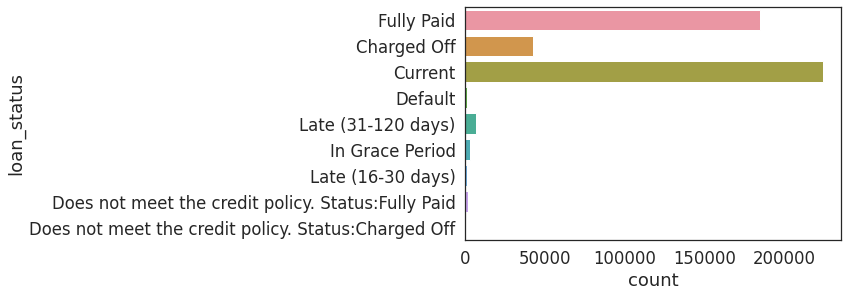

In [ ]:
sns.countplot(data=data_viz, y='loan_status')

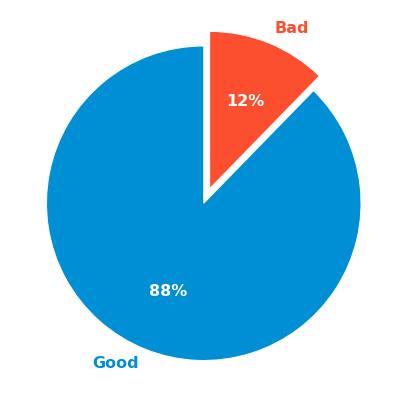

In [ ]:
pie_data = data_viz['target'].value_counts(normalize=True).values * 100
pie_label = data_viz['target'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()

plt.show()

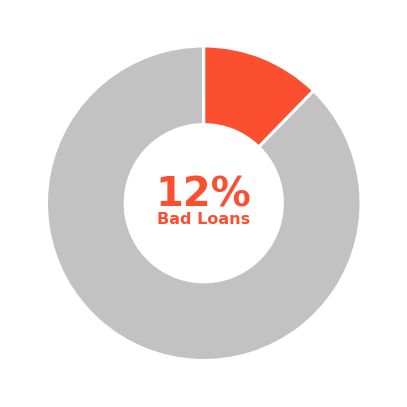

In [ ]:
pie_data = data_viz['target'].value_counts(normalize=True).values * 100
pie_label = data_viz['target'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges = ax.pie(pie_data, startangle=90,
                wedgeprops={'width':0.5, 'linewidth':3},
                colors=['#C2C2C2', '#FC4F30'])

text_1 = f'{pie_data[1]:.0f}%'
text_2 = 'Bad Loans'

ax.text(0, 0.05, text_1, fontsize=40, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')
ax.text(0, -0.1, text_2, fontsize=16, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')

plt.tight_layout()

plt.show()

As we can see, 12% of borrowers have bad loan status. Technically speaking, this dataset is an imbalanced dataset.

## Employment Title and Length

Let's take a look at the missing values on the employment title and employment length columns

### Missing Values

<AxesSubplot:>

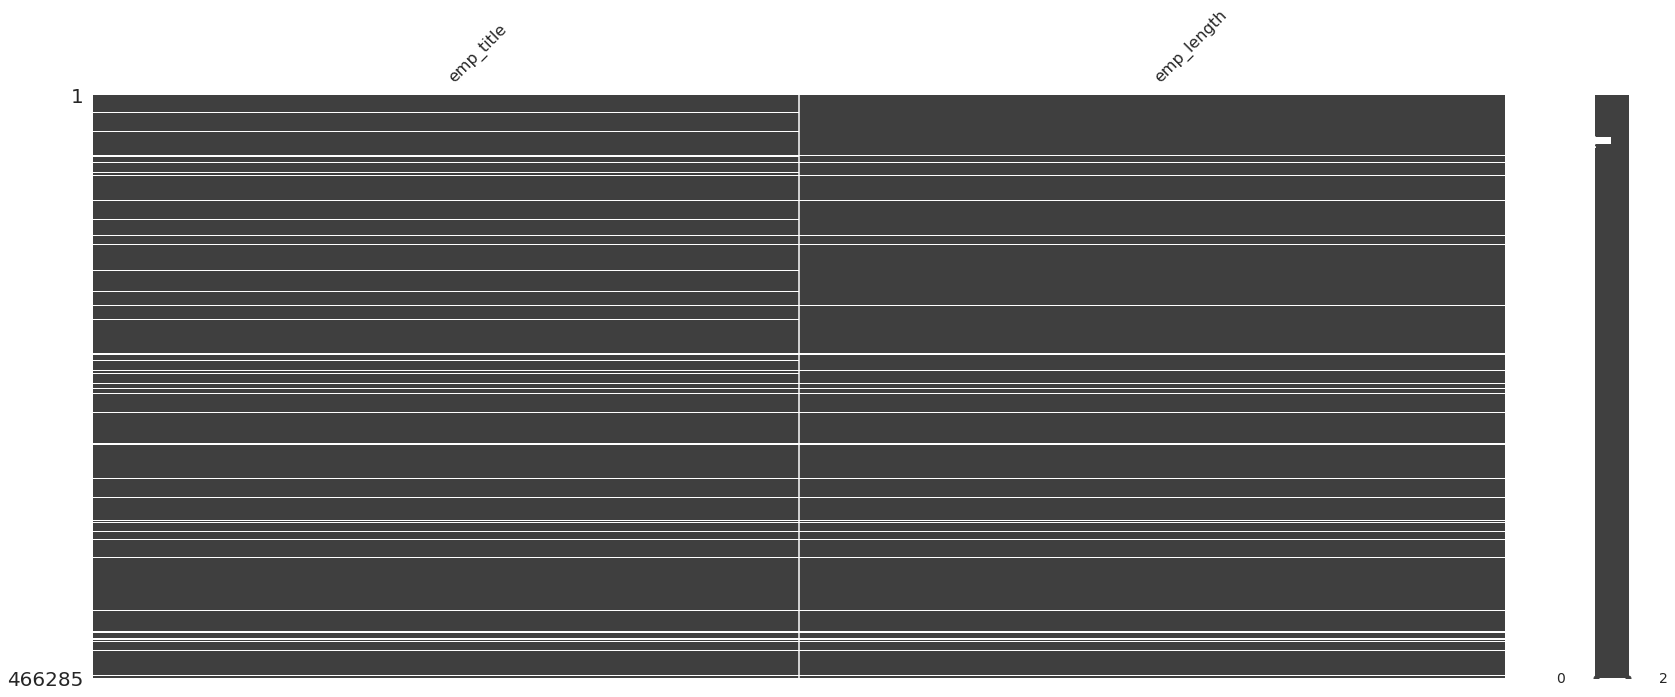

In [ ]:
msno.matrix(data_viz.loc[:, ['emp_title', 'emp_length']])

It seems that, if the employment length is null, then the employment title is always null. I assume that the borrowers are job seekers, unemployed, fresh graduate, or something else that doesn't have any working experience.

In [ ]:
mask_1 = data_viz['emp_title'].astype(str).str.lower().str.contains('college|student|graduate')
mask_2 = data_viz['emp_length'].astype(str).str.contains('1 year|< 1 year')

mask = mask_1 & (~mask_2)

data_viz.loc[mask, ['emp_title', 'emp_length']].sort_values(by='emp_length').head()

emp_title emp_length
136042                   first student  10+ years
93583                   Calvin College  10+ years
183527  West Georgia Technical College  10+ years
183588        Tacoma Community College  10+ years
184122                    OLOL College  10+ years

In [ ]:
data_viz.loc[mask, 'emp_length'].value_counts().sort_index()

10+ years    502
2 years      152
3 years      172
4 years      131
5 years      131
6 years      106
7 years      100
8 years       76
9 years       76
Name: emp_length, dtype: int64

However, if I search for `college`, `student`, or `graduate` in the employment title, the most frequent employment length is `10+ years`. So, I can't really figure out what is their job.

In [ ]:
mask_1 = data_viz['emp_title'].astype(str).str.lower().str.contains('graduate')
mask_2 = data_viz['emp_length'].astype(str).str.contains('1 year|< 1 year')

mask = mask_1 & (~mask_2)

data_viz.loc[mask, ['emp_title', 'emp_length']].sort_values(by='emp_length', ascending=False).head()

emp_title emp_length
81194               Manager of Graduate Programs    8 years
284694  Dean of Graduate, Adult, Online Programs    7 years
70696      Director of Graduate Student Services    7 years
384029                       Graduate Engineer 1    7 years
443392               Graduate Student/Instructor    6 years

In [ ]:
mask = data_viz['emp_length'].astype(str).str.contains('1 year|< 1 year')

data_viz.loc[mask, ['annual_inc']].describe()

annual_inc
count   6.588e+04
mean    6.863e+04
std     4.634e+04
min     1.896e+03
25%     4.000e+04
50%     5.800e+04
75%     8.500e+04
max     2.040e+06

In [ ]:
tmp = data_viz.groupby(by='emp_length', dropna=False)['annual_inc'].describe()

tmp.style.background_gradient()

In [ ]:
tmp = data_viz.groupby(by='emp_length', dropna=False)['annual_inc'].agg(['mean', 'std', 'median', 'min', 'max'])

tmp.style.background_gradient()

As we can see, borrowers that have `nan` in the `emp_length` have the lowest annual income statistics, except for the minimum value.
<br><br>
If you are not working (for example as a student, fresh graduate, job seeker, etc.), you (mostly) don't have any income. So, I will fill the missing values on the `emp_length` with `0` which means they are not working even though they have annual income. Maybe from their internship, part-time work, or something else(?)

### Wordcloud

Good colormap for wordcloud: Set2, Paired, Dark2, tab10, gray

In [ ]:
data_viz['emp_title'].value_counts().head(10)

Teacher             5399
Manager             4438
Registered Nurse    2316
RN                  2204
Supervisor          1967
Project Manager     1624
Sales               1624
Owner               1527
Office Manager      1395
manager             1312
Name: emp_title, dtype: int64

RN stands for Registered Nurse

In [ ]:
data_viz['emp_title'].replace({'RN':'Registered Nurse'}).fillna('Unknown').value_counts().head(10)

Unknown             27588
Teacher              5399
Registered Nurse     4520
Manager              4438
Supervisor           1967
Project Manager      1624
Sales                1624
Owner                1527
Office Manager       1395
manager              1312
Name: emp_title, dtype: int64

There are some employment titles that have similar 'level', such as manager. We can see the most frequent word using a wordcloud.

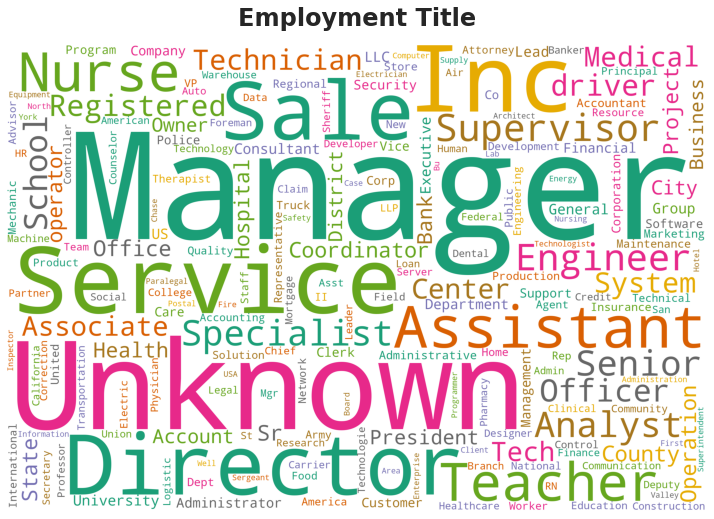

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, 
                      random_state=1, background_color='white', 
                      colormap='Dark2', collocations=False, 
                      stopwords = STOPWORDS).generate(' '.join(data_viz['emp_title'].replace({'RN':'Registered Nurse'}).fillna('Unknown')))

wordcloud_plot(wordcloud, title='Employment Title')

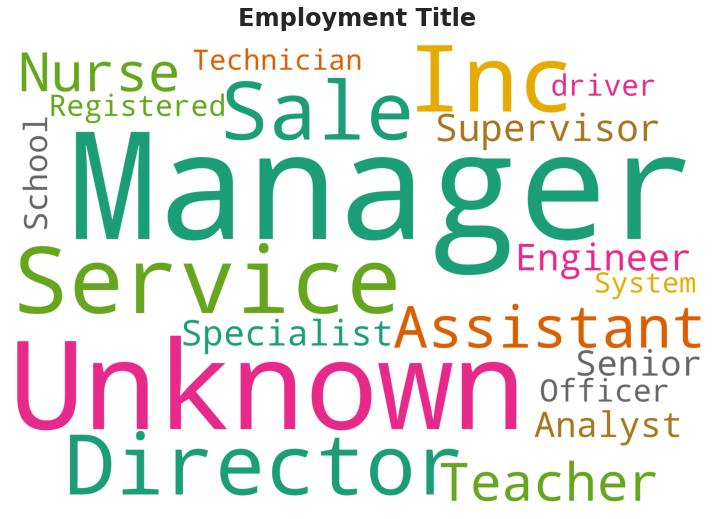

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, 
                      random_state=1, background_color='white', 
                      colormap='Dark2', collocations=False, 
                      max_words=20,
                      stopwords = STOPWORDS).generate(' '.join(data_viz['emp_title'].replace({'RN':'Registered Nurse'}).fillna('Unknown')))

wordcloud_plot(wordcloud, title='Employment Title')

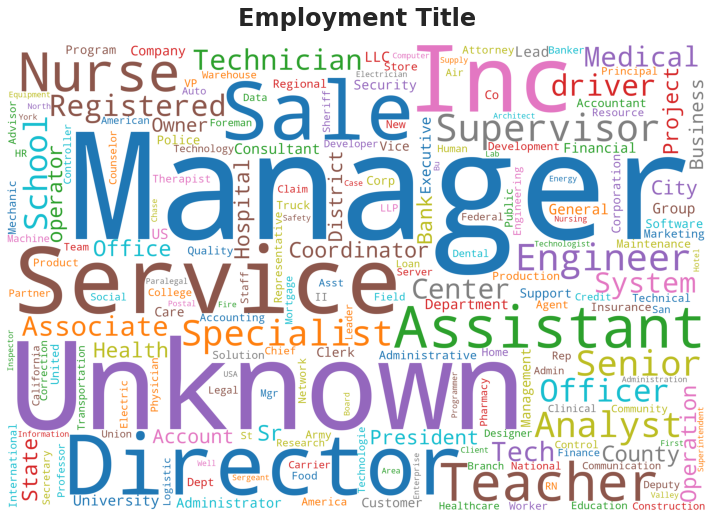

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, 
                      random_state=1, background_color='white', 
                      colormap='tab10', collocations=False, 
                      stopwords = STOPWORDS).generate(' '.join(data_viz['emp_title'].replace({'RN':'Registered Nurse'}).fillna('Unknown')))

wordcloud_plot(wordcloud, title='Employment Title')

Let's see the top 20 words

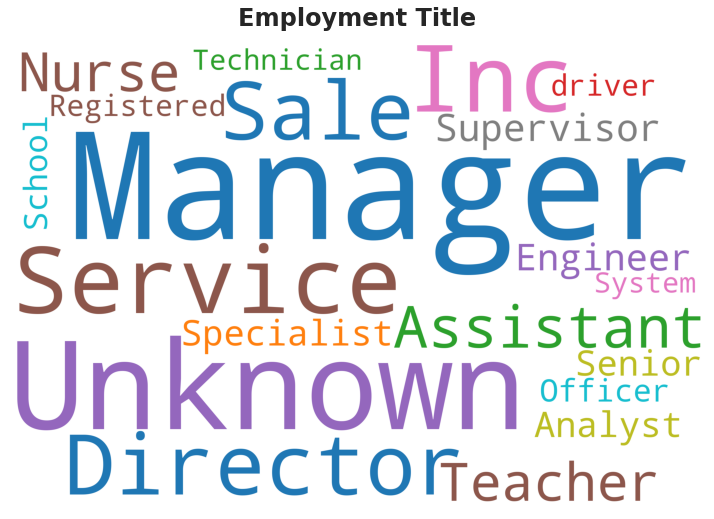

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, 
                      random_state=1, background_color='white', 
                      colormap='tab10', collocations=False, 
                      max_words=20,
                      stopwords = STOPWORDS).generate(' '.join(data_viz['emp_title'].replace({'RN':'Registered Nurse'}).fillna('Unknown')))

wordcloud_plot(wordcloud, title='Employment Title')

I want to check the percentage of these words in the dataset.

In [ ]:
emp_title = 'nurse|registered|technician|sale|inc|driver|supervisor|school|manager|engineer|system|service|specialist|assistant|senior|officer|analyst|unknown|director|teacher'
mask = data_viz['emp_title'].fillna('Unknown').astype(str).str.lower().str.contains(emp_title)

total_row = data_viz.shape[0]

percentage = (mask.sum() / total_row) * 100
percentage

43.19675734797388

The total is only 43%, so I can say that employment titles vary widely. Therefore, at least for now, I can't change the employment title to "other" for words that are not in the top 20. 
<br><br>

Actually, we can 'summarize' the employment title. But for now, I will just drop it since its cardinality is very high and I still don't know how to handle this problem. If you have any idea, please let me know!

## Title and Purpose

If we take a look at the title and purpose columns, we can see a similar information.

In [ ]:
data_viz.loc[:10, ['title','purpose']]

title             purpose
0                                Computer         credit_card
1                                    bike                 car
2                    real estate business      small_business
3                                personel               other
4                                Personal               other
5   My wedding loan I promise to pay back             wedding
6                                    Loan  debt_consolidation
7                         Car Downpayment                 car
8    Expand Business & Buy Debt Portfolio      small_business
9             Building my credit history.               other
10             High intrest Consolidation  debt_consolidation

This is what I said in the previous section. It looks like the `purpose` column is a generalized term for `title`.

In [ ]:
data_viz['title'].nunique()

63099

See? The `title`'s cardinality is very high compared to the `purpose`

In [ ]:
data_viz['purpose'].nunique()

14

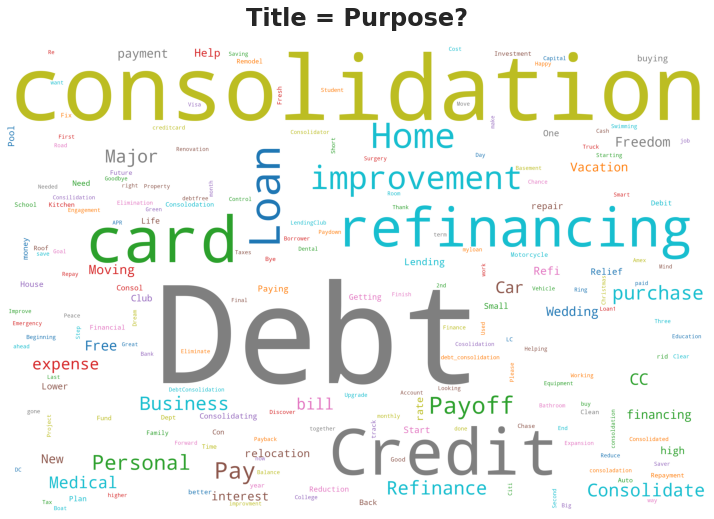

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, 
                      random_state=1, background_color='white', 
                      colormap='tab10', collocations=False, 
                      stopwords = STOPWORDS).generate(' '.join(data_viz['title'].fillna('Unknown')))

wordcloud_plot(wordcloud, title='Title = Purpose?')

Since the `title` and `purpose` have similar meaning, I will just drop the `title` column later.

## Column List

In [ ]:
column_numerical = data_viz.select_dtypes(include=np.number).columns.values.tolist()
column_numerical

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [ ]:
column_categorical = data_viz.select_dtypes(exclude=np.number).columns.values.tolist()
column_categorical

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'target']

## Feature Cardinality

Let's see the variation (cardinality) of categorical features

In [ ]:
data_viz[column_categorical].apply(lambda x: x.unique())

term                                            [ 36 months,  60 months]
grade                                              [B, C, A, E, F, D, G]
sub_grade              [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...
emp_title              [nan, Ryder, AIR RESOURCES BOARD, University M...
emp_length             [10+ years, < 1 year, 1 year, 3 years, 8 years...
home_ownership                   [RENT, OWN, MORTGAGE, OTHER, NONE, ANY]
verification_status            [Verified, Source Verified, Not Verified]
issue_d                [Dec-11, Nov-11, Oct-11, Sep-11, Aug-11, Jul-1...
loan_status            [Fully Paid, Charged Off, Current, Default, La...
pymnt_plan                                                        [n, y]
url                    [https://www.lendingclub.com/browse/loanDetail...
purpose                [credit_card, car, small_business, other, wedd...
title                  [Computer, bike, real estate business, persone...
zip_code               [860xx, 309xx, 606xx, 917xx,

In [ ]:
data_viz[column_categorical].nunique().sort_values()

application_type            1
term                        2
initial_list_status         2
pymnt_plan                  2
target                      2
verification_status         3
home_ownership              6
grade                       7
loan_status                 9
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    91
last_pymnt_d               98
last_credit_pull_d        103
earliest_cr_line          664
zip_code                  888
title                   63099
emp_title              205475
url                    466285
dtype: int64

- The `application_type` only has a single unique value. So, I'll drop it since it will not give any information
- There are some columns that have too many categories. I will drop it since it will make the model become overfit or too sensitive to "noise"

## Dropping Columns

### Single Variation

I will drop the `application_type` since it only has a single variation

In [ ]:
data_viz.drop(columns=['application_type'], inplace=True)

### High Cardinality

I will drop some categorical columns that have too many categories and hard to find its pattern. From the previous section, we know that `title`, `emp_title`, and `url` have a high cardinality. So, I will drop it.

In [ ]:
data_viz.drop(columns=['title', 'emp_title', 'url'], inplace=True)

### Zip Code

In [ ]:
data_viz[['zip_code', 'addr_state']].sort_values('zip_code').head(10)

zip_code addr_state
29984     007xx         NJ
342425    007xx         FL
285814    007xx         PA
325695    008xx         VA
231293    010xx         MA
9236      010xx         MA
43706     010xx         MA
113322    010xx         MA
113272    010xx         MA
9270      010xx         MA

As we can see, a same zip code has different address state. So, I think zip code (in this dataset) doesn't give an exact information. So, I will drop it.

In [ ]:
data_viz.drop(columns=['zip_code'], inplace=True)

### ID Number

I think, the ID number (`id` and `member_id`) doesn't give any information about the borrowers. I will drop it.

In [ ]:
data_viz.drop(columns=['id', 'member_id'], inplace=True)

### Update Column List

In [ ]:
column_numerical = data_viz.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_viz.select_dtypes(exclude=np.number).columns.values.tolist()

data_viz[column_categorical].nunique().sort_values()

term                     2
pymnt_plan               2
initial_list_status      2
target                   2
verification_status      3
home_ownership           6
grade                    7
loan_status              9
emp_length              11
purpose                 14
sub_grade               35
addr_state              50
issue_d                 91
last_pymnt_d            98
last_credit_pull_d     103
earliest_cr_line       664
dtype: int64

As seen above, the last 4 columns that have the highest variation are date columns.

## Date Features

I do this project on a limited time. So, this is a simple approach to handle the date columns. I will just use the 'year' instead of 'month-year' format. Fortunately, the date columns are in a fixed format (and clean!). I just need to convert to datetime format.

In [ ]:
column_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

for col in column_date:
  # split to individual columns
  tmp = data_viz[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  # data_viz[col] = tmp['year']

  print(np.sort(tmp['year'].unique()))

[ 7  8  9 10 11 12 13 14]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 44. 46. 48. 49. 50. 51.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99. nan]


I have to add the year prefix (its century) to avoid misleading information.

In [ ]:
column_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']
column_date_split = list()

for col in column_date:
  # define the column names
  col_month = f'{col}_month'
  col_year = f'{col}_year'
  col_update = f'{col}_update'

  column_date_split.append(col_update)
  column_date_split.append(col_month)
  column_date_split.append(col_year)

  # split to individual columns
  tmp = data_viz[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # add year prefix (century), whether it's 19 or 20
  tmp['year'] = tmp['year'].apply(lambda x: np.nan if pd.isna(x) else 
                                  (f'20{x}' if int(x) <= 16 else f'19{x}'))


  # update date format
  date_update = tmp['month'] + '-' + tmp['year']

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  data_viz[col_month] = tmp['month']
  data_viz[col_year] = tmp['year']
  
  # update date format
  # data_viz[col_update] = pd.to_datetime(date_update, errors='coerce')
  data_viz[col_update] = date_update

  print(np.sort(tmp['year'].unique()))

[2007 2008 2009 2010 2011 2012 2013 2014]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[1944. 1946. 1948. 1949. 1950. 1951. 1953. 1954. 1955. 1956. 1957. 1958.
 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970.
 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982.
 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994.
 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006.
 2007. 2008. 2009. 2010. 2011.   nan]


In [ ]:
data_viz.loc[:5, column_date]

issue_d last_pymnt_d last_credit_pull_d earliest_cr_line
0  Dec-11       Jan-15             Jan-16           Jan-85
1  Dec-11       Apr-13             Sep-13           Apr-99
2  Dec-11       Jun-14             Jan-16           Nov-01
3  Dec-11       Jan-15             Jan-15           Feb-96
4  Dec-11       Jan-16             Jan-16           Jan-96
5  Dec-11       Jan-15             Sep-15           Nov-04

In [ ]:
data_viz.loc[:5, column_date_split]

issue_d_update issue_d_month  issue_d_year last_pymnt_d_update  \
0       Dec-2011           Dec          2011            Jan-2015   
1       Dec-2011           Dec          2011            Apr-2013   
2       Dec-2011           Dec          2011            Jun-2014   
3       Dec-2011           Dec          2011            Jan-2015   
4       Dec-2011           Dec          2011            Jan-2016   
5       Dec-2011           Dec          2011            Jan-2015   

  last_pymnt_d_month  last_pymnt_d_year last_credit_pull_d_update  \
0                Jan             2015.0                  Jan-2016   
1                Apr             2013.0                  Sep-2013   
2                Jun             2014.0                  Jan-2016   
3                Jan             2015.0                  Jan-2015   
4                Jan             2016.0                  Jan-2016   
5                Jan             2015.0                  Sep-2015   

  last_credit_pull_d_month  last_credit_pull_d_year earliest_cr_line_update  \
0                      Jan                   2016.0                Jan-1985   
1                      Sep                   2013.0                Apr-1999   
2                      Jan                   2016.0                Nov-2001   
3                      Jan                   2015.0                Feb-1996   
4                      Jan                   2016.0                Jan-1996   
5                      Sep                   2015.0                Nov-2004   

  earliest_cr_line_month  earliest_cr_line_year  
0                    Jan                 1985.0  
1                    Apr                 1999.0  
2                    Nov                 2001.0  
3                    Feb                 1996.0  
4                    Jan                 1996.0  
5                    Nov                 2004.0

## Grade

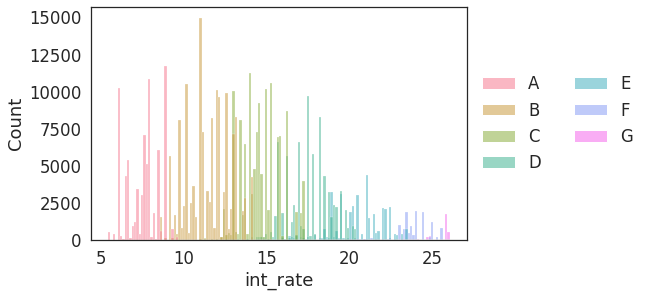

In [ ]:
ax = sns.histplot(data=data.sort_values(by='grade'), x='int_rate', hue='grade')
sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5), title='', ncol=2, frameon=False)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

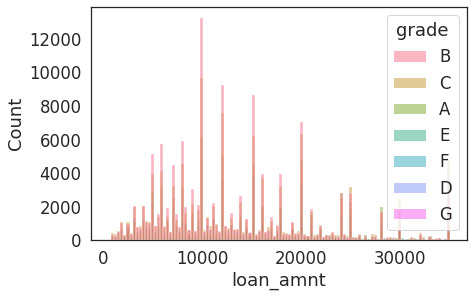

In [ ]:
sns.histplot(data=data, x='loan_amnt', hue='grade')

## Loan Credit Risk Probability (Numerical Features)

In [ ]:
column_numerical = data_viz.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_viz.select_dtypes(exclude=np.number).columns.values.tolist()

data_viz[column_categorical].nunique().sort_values()

term                           2
pymnt_plan                     2
initial_list_status            2
target                         2
verification_status            3
home_ownership                 6
grade                          7
loan_status                    9
emp_length                    11
last_pymnt_d_month            12
last_credit_pull_d_month      12
earliest_cr_line_month        12
issue_d_month                 12
purpose                       14
sub_grade                     35
addr_state                    50
issue_d_update                91
issue_d                       91
last_pymnt_d                  98
last_pymnt_d_update           98
last_credit_pull_d           103
last_credit_pull_d_update    103
earliest_cr_line             664
earliest_cr_line_update      664
dtype: int64

### Issued Date

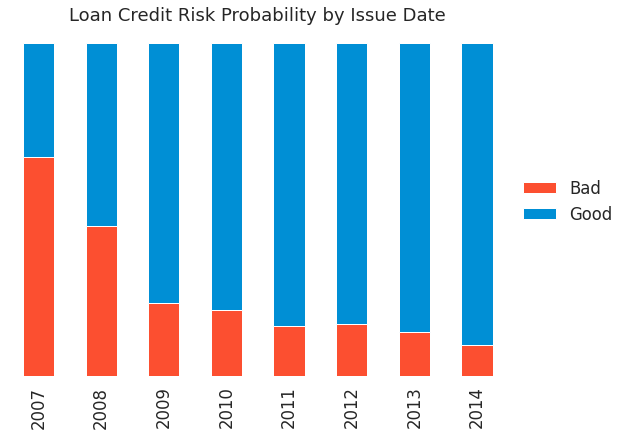

In [ ]:
stacked_bar_plot(data=data_viz, x='issue_d_year', y='target',
                 orient='vertical', annot=False, sortby='index',
                 title='Loan Credit Risk Probability by Issue Date')

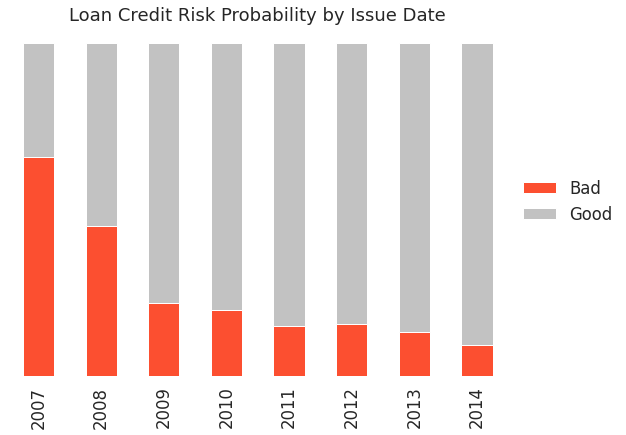

In [ ]:
stacked_bar_plot(data=data_viz, x='issue_d_year', y='target',
                 orient='vertical', annot=False, sortby='index',
                 title='Loan Credit Risk Probability by Issue Date',
                 color='single')

The earlier the issue date is, the higher the probability of a borrower to have a bad loan status

### Last Payment Date

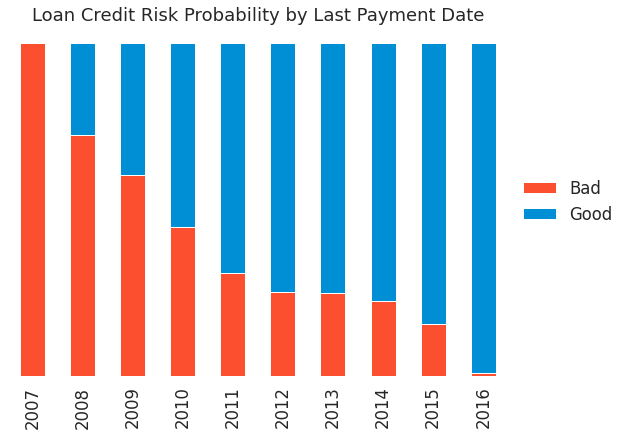

In [ ]:
stacked_bar_plot(data=data_viz, x='last_pymnt_d_year', y='target',
                 orient='vertical', annot=False, sortby='index',
                 title='Loan Credit Risk Probability by Last Payment Date',
                 index_type=int)

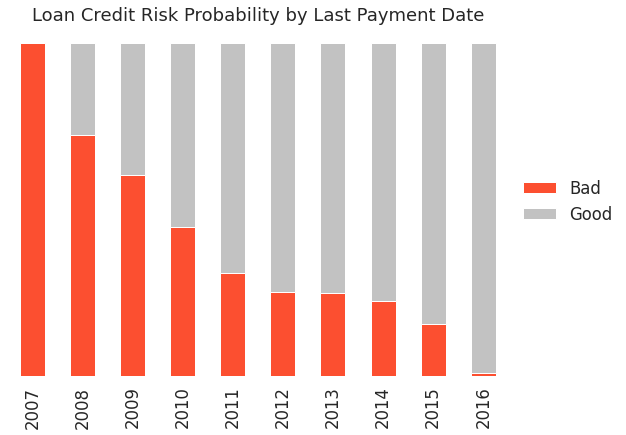

In [ ]:
stacked_bar_plot(data=data_viz, x='last_pymnt_d_year', y='target',
                 orient='vertical', annot=False, sortby='index',
                 title='Loan Credit Risk Probability by Last Payment Date',
                 index_type=int, color='single')

If the last payment has been made a long time ago, then the probability of a borrower to have a bad loan status will be higher

### Last Credit Pull Date

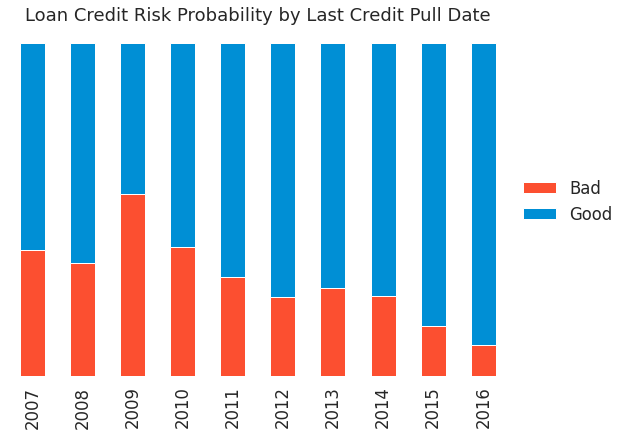

In [ ]:
stacked_bar_plot(data=data_viz, x='last_credit_pull_d_year', y='target',
                 orient='vertical', annot=False, sortby='index',
                 title='Loan Credit Risk Probability by Last Credit Pull Date',
                 index_type=int)

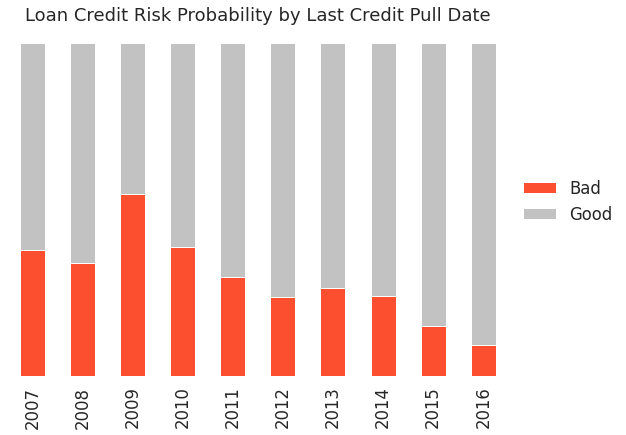

In [ ]:
stacked_bar_plot(data=data_viz, x='last_credit_pull_d_year', y='target',
                 orient='vertical', annot=False, sortby='index',
                 title='Loan Credit Risk Probability by Last Credit Pull Date',
                 index_type=int, color='single')

From this plot, we can't really see a pattern from the borrowers' last credit pull date.

### Loan Amount

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

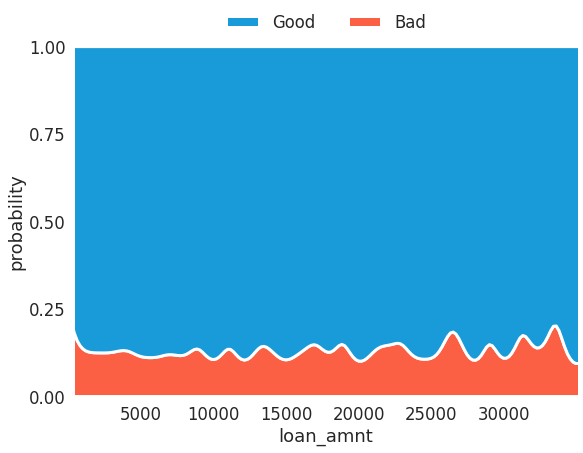

In [ ]:
kde_proba_plot(data_viz, x='loan_amnt', hue='target', xticks_step=5000)

Low or high loan amount doesn't show any differences in terms of the probability to have a bad loan status

### Interest Rate

Interest rate on the loan

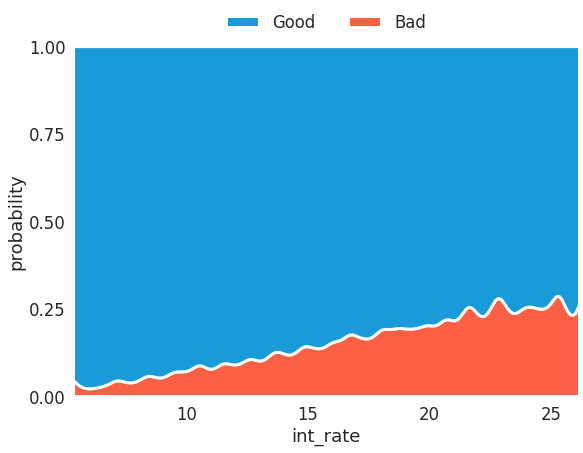

In [ ]:
kde_proba_plot(data_viz, x='int_rate', hue='target', xticks_step=5)

Borrowers with high-interest rates have a higher probability to have a bad loan status than those with a low-interest rate

### Installment

The monthly payment owed by the borrower if the loan originates.

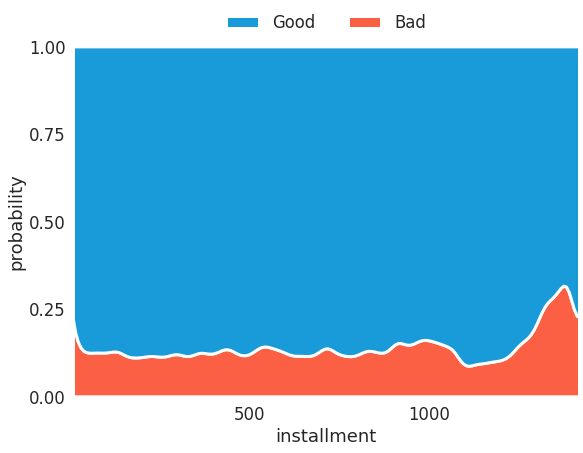

In [ ]:
kde_proba_plot(data_viz, x='installment', hue='target', xticks_step=500)

From this plot, we can't really see a pattern from the borrowers' installments.

### Total Acc

The total number of credit lines currently in the borrower's credit file

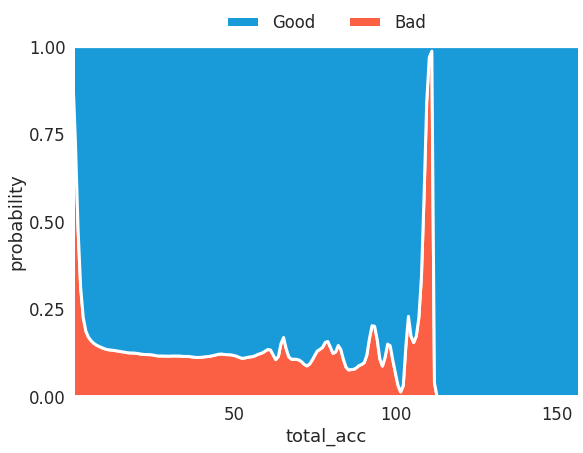

In [ ]:
kde_proba_plot(data_viz, x='total_acc', hue='target', xticks_step=50)

### Total Received Principal

Principal received to date

Pinjaman pokok yang diterima

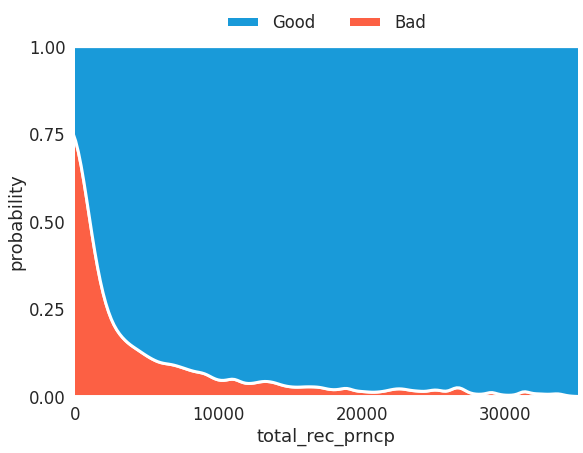

In [ ]:
kde_proba_plot(data_viz, x='total_rec_prncp', hue='target', xticks_step=10000)

### Outstanding Principal

Remaining outstanding principal for total amount funded

Pinjaman pokok yang belum terbayarkan

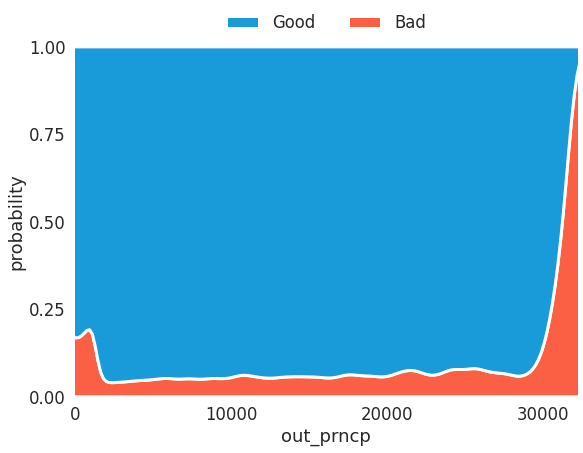

In [ ]:
kde_proba_plot(data_viz, x='out_prncp', hue='target', xticks_step=10000)

### Total Payment

Payments received to date for total amount funded

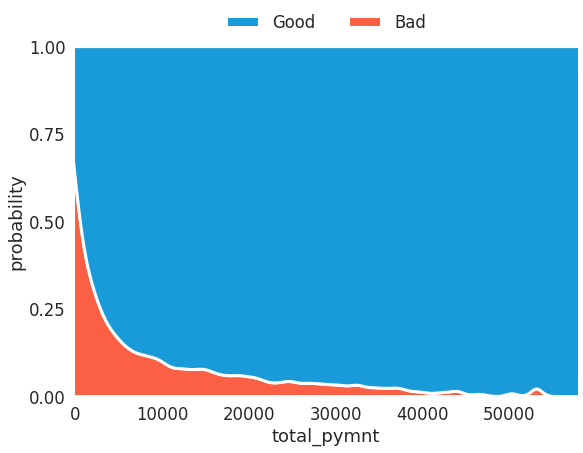

In [ ]:
kde_proba_plot(data_viz, x='total_pymnt', hue='target', xticks_step=10000)

### Last Payment Amount

Last total payment amount received

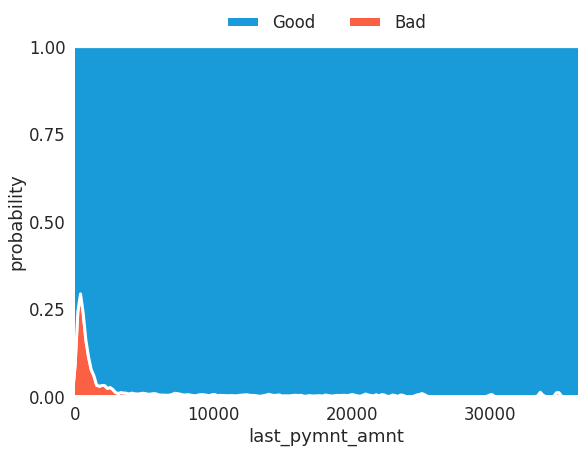

In [ ]:
kde_proba_plot(data_viz, x='last_pymnt_amnt', hue='target', xticks_step=10000)

## Loan Credit Risk Probability (Categorical Features)

### Grade

In [ ]:
columns = data_viz['target']

col_tmp = ['grade']
attr_crosstab = pd.DataFrame()

for col in col_tmp:
  # create crosstab for each attribute
  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('Good', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

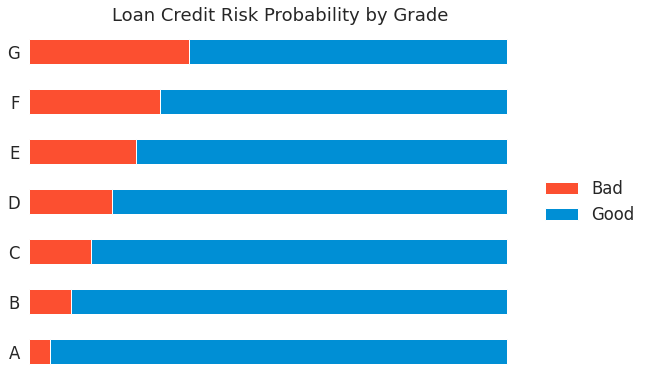

In [ ]:
stacked_bar_plot(data=data_viz, x='grade', y='target', annot=False)

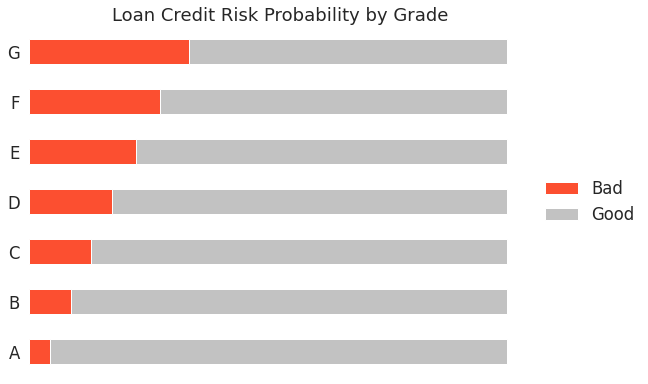

In [ ]:
stacked_bar_plot(data=data_viz, x='grade', y='target', annot=False, color='single')

We have a clear pattern. The grade column has a natural order based on the loan status probability
- Grade A has the highest probability to have a good loan status.
- Grade G has the lowest probability to have a good loan status

### Sub Grade

In [ ]:
columns = data_viz['target']

col_tmp = ['sub_grade']
attr_crosstab = pd.DataFrame()

for col in col_tmp:
  # create crosstab for each attribute
  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('Good', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

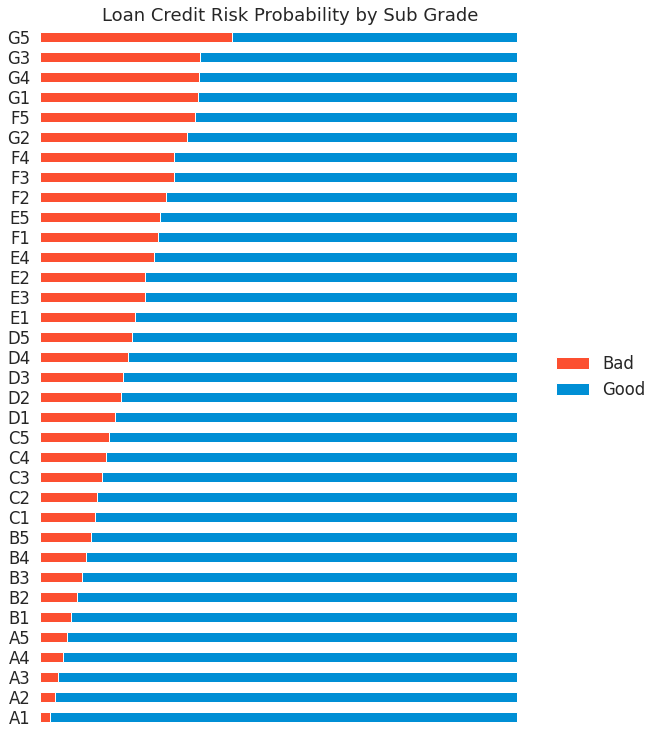

In [ ]:
_, ax = plt.subplots(figsize=(8,12))
stacked_bar_plot(data=data_viz, x='sub_grade', y='target', ax=ax, annot=False)

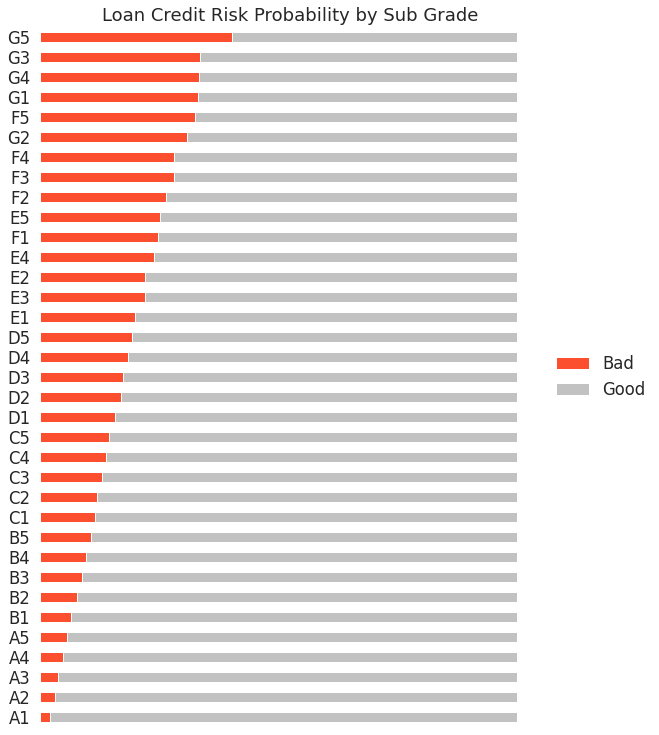

In [ ]:
_, ax = plt.subplots(figsize=(8,12))
stacked_bar_plot(data=data_viz, x='sub_grade', y='target', ax=ax, annot=False, color='single')

Here, we also have a clear pattern. The sub-grade column has a natural order based on the loan status probability. However, if we take a look at some points, we can see that:
- Sub-grade E3 has a higher probability to have good loan status than sub-grade E2
- Sub-grade F1 has a higher probability to have good loan status than sub-grade E5
- Sub-grade G2 has a higher probability to have good loan status than sub-grade G1 and F5
- Sub-grade G4 has a higher probability to have good loan status than sub-grade G3
<br>

Maybe, there are some outliers in the dataset that cause the probability is not matching the grade. In other words, the company gives a "good grade" to a borrower, but it turns out that the borrower has a bad loan status. So, we can't only rely on the grade or sub-grade feature to predict the borrowers' loan status. But, it might be a good feature to be used in our model.
<br><br>

However, since the grade and sub-grade have similar information, maybe I will just drop one of these features later. Just to avoid the curse of dimensionality and multicollinearity.

### Term

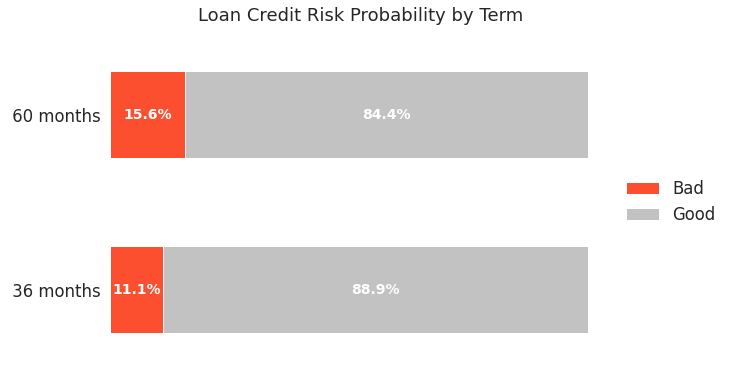

In [ ]:
stacked_bar_plot(data=data_viz, x='term', y='target', color='single')

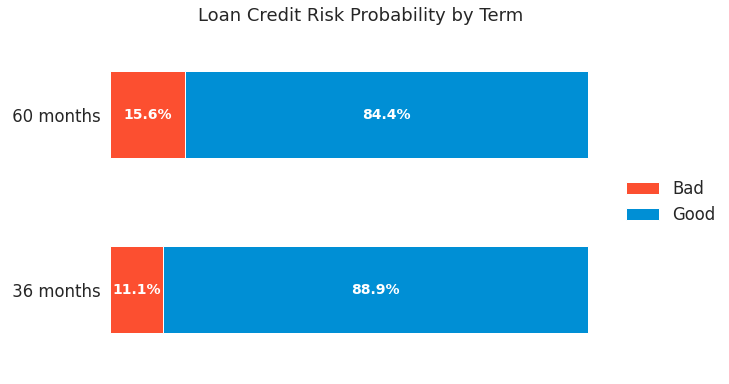

In [ ]:
stacked_bar_plot(data=data_viz, x='term', y='target')

### Employment Length

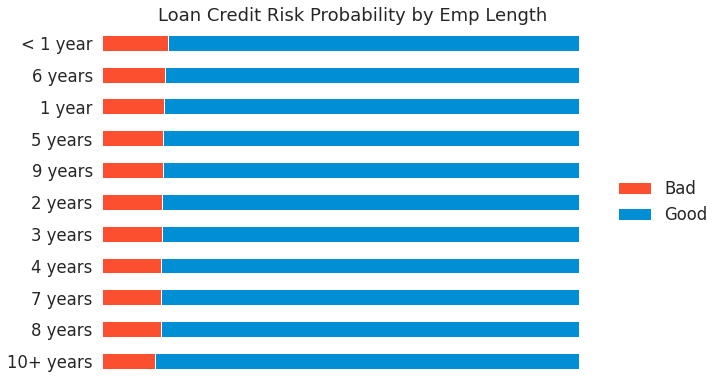

In [ ]:
stacked_bar_plot(data=data_viz, x='emp_length', y='target', annot=False)

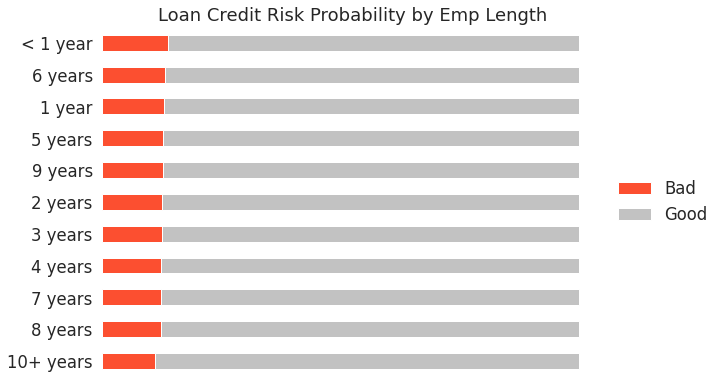

In [ ]:
stacked_bar_plot(data=data_viz, x='emp_length', y='target', annot=False, color='single')

### Home Ownership

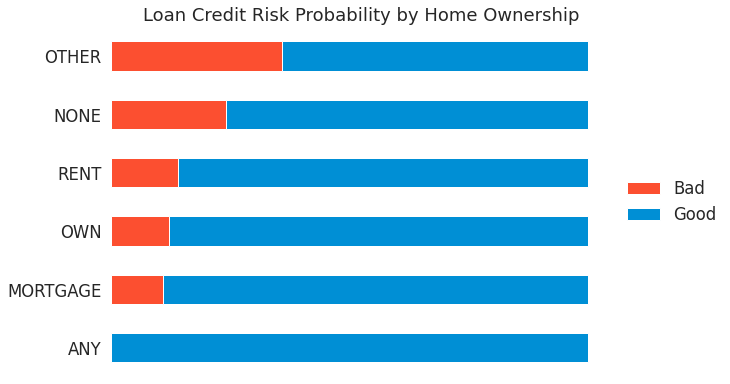

In [ ]:
stacked_bar_plot(data=data_viz, x='home_ownership', y='target', annot=False)

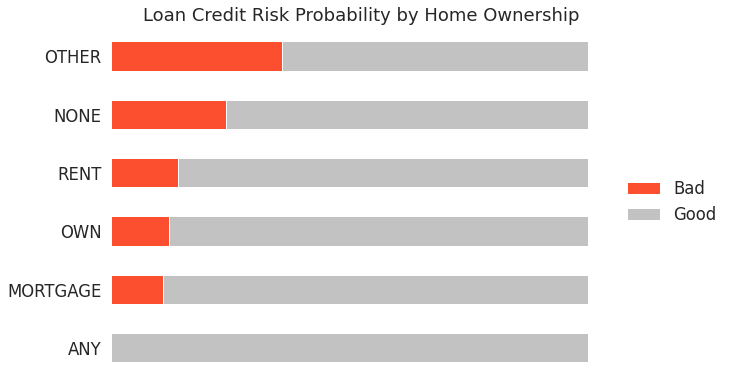

In [ ]:
stacked_bar_plot(data=data_viz, x='home_ownership', y='target', annot=False, color='single')

### Payment Plan

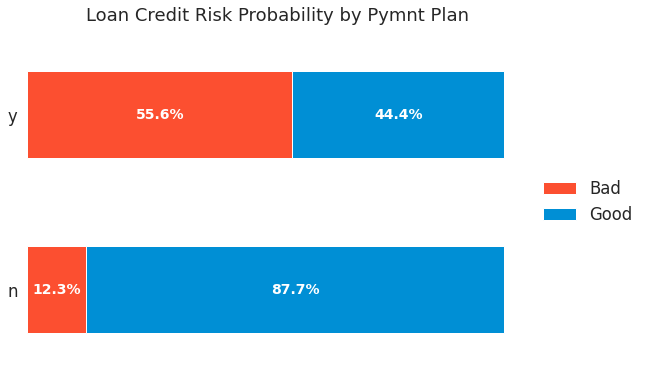

In [ ]:
stacked_bar_plot(data=data_viz, x='pymnt_plan', y='target')

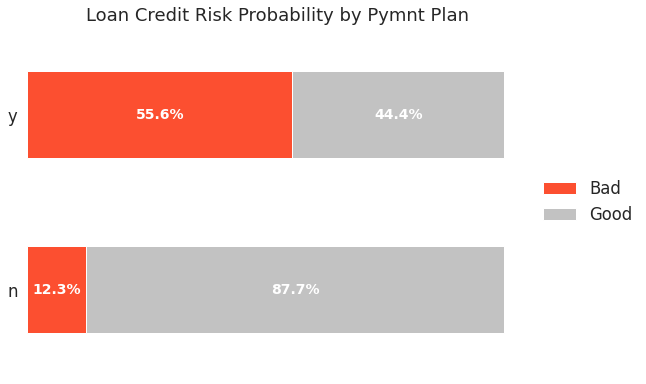

In [ ]:
stacked_bar_plot(data=data_viz, x='pymnt_plan', y='target', color='single')

### Purpose

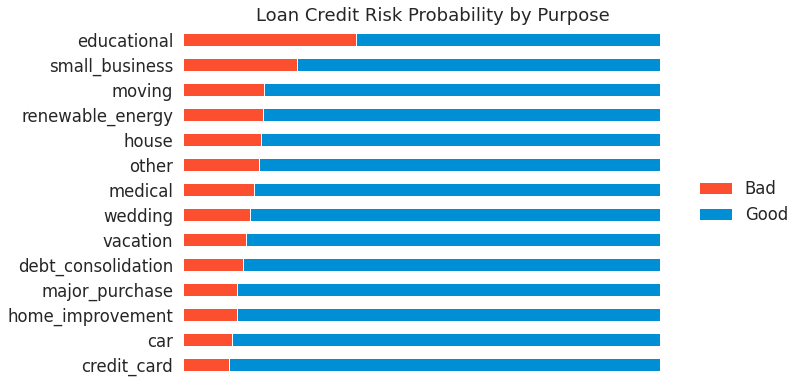

In [ ]:
stacked_bar_plot(data=data_viz, x='purpose', y='target', annot=False)

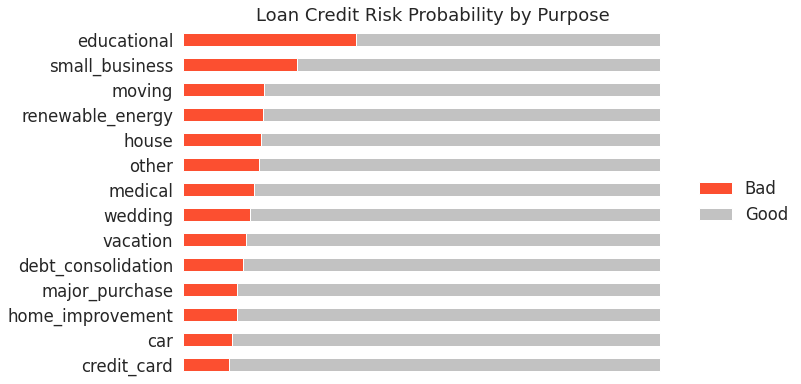

In [ ]:
stacked_bar_plot(data=data_viz, x='purpose', y='target', annot=False, color='single')

### Address State

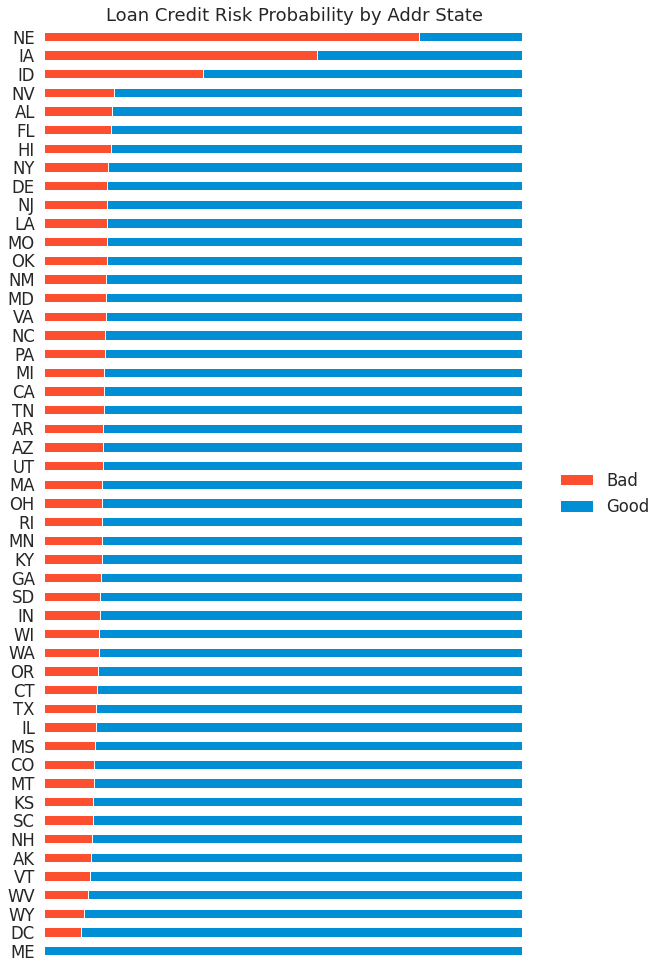

In [ ]:
_, ax = plt.subplots(figsize=(8,16))
stacked_bar_plot(data=data_viz, x='addr_state', y='target', ax=ax, annot=False)

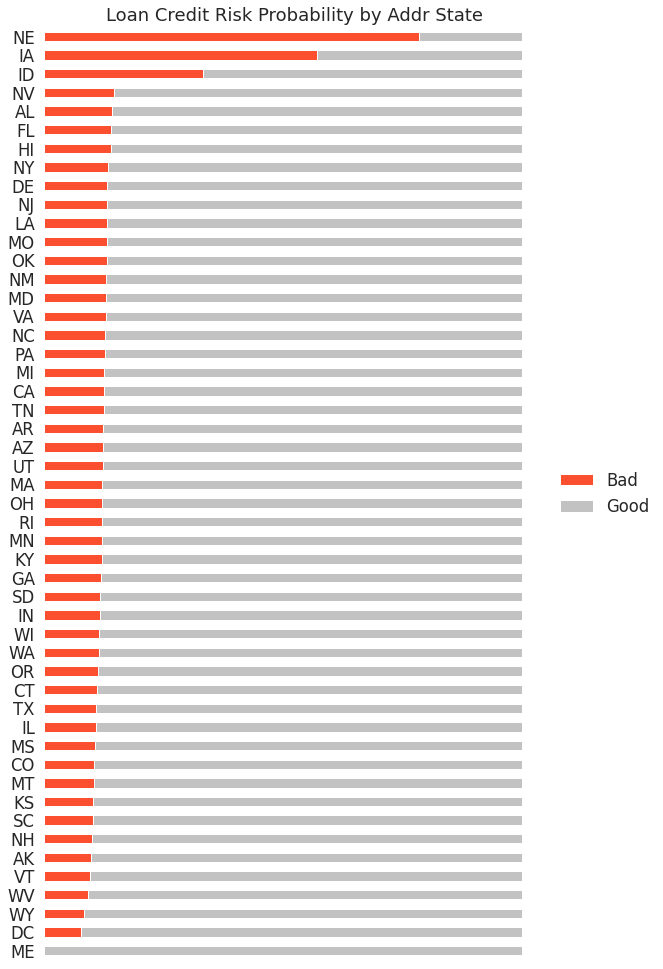

In [ ]:
_, ax = plt.subplots(figsize=(8,16))
stacked_bar_plot(data=data_viz, x='addr_state', y='target', ax=ax, annot=False, color='single')

### Initial List Status

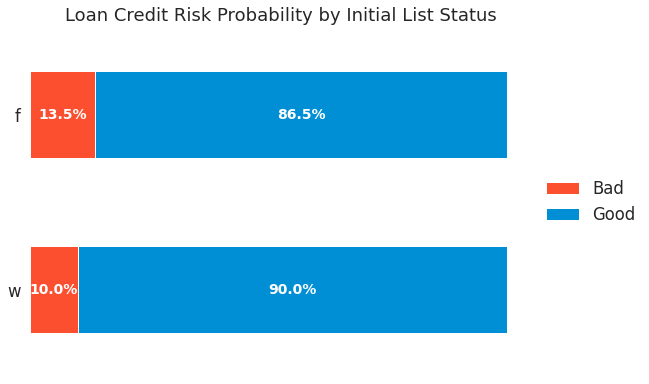

In [ ]:
stacked_bar_plot(data=data_viz, x='initial_list_status', y='target')

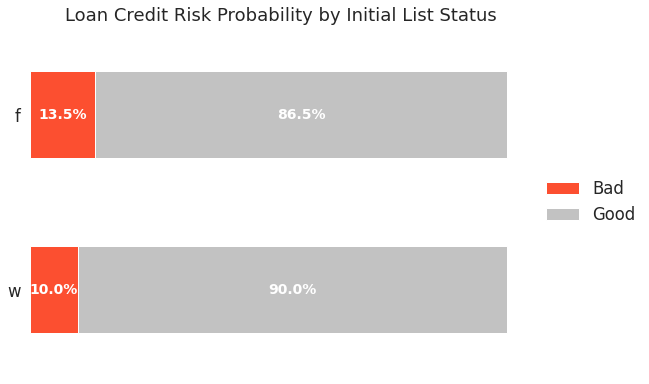

In [ ]:
stacked_bar_plot(data=data_viz, x='initial_list_status', y='target', color='single')

## Feature Associations

I will calculate the associations between each features to the target variable. Then, I will drop some features that have very small associations to the target variable.
<br><br>
I will mark the independent features that are highly correlated to each other, or we can say it as multicollinearity.

In [ ]:
# update column list
column_numerical = data_viz.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_viz.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data_viz,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/dython/nominal.py:270: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  RuntimeWarning)


### Associations to Target

Associations can be used to describe the relationship between features.

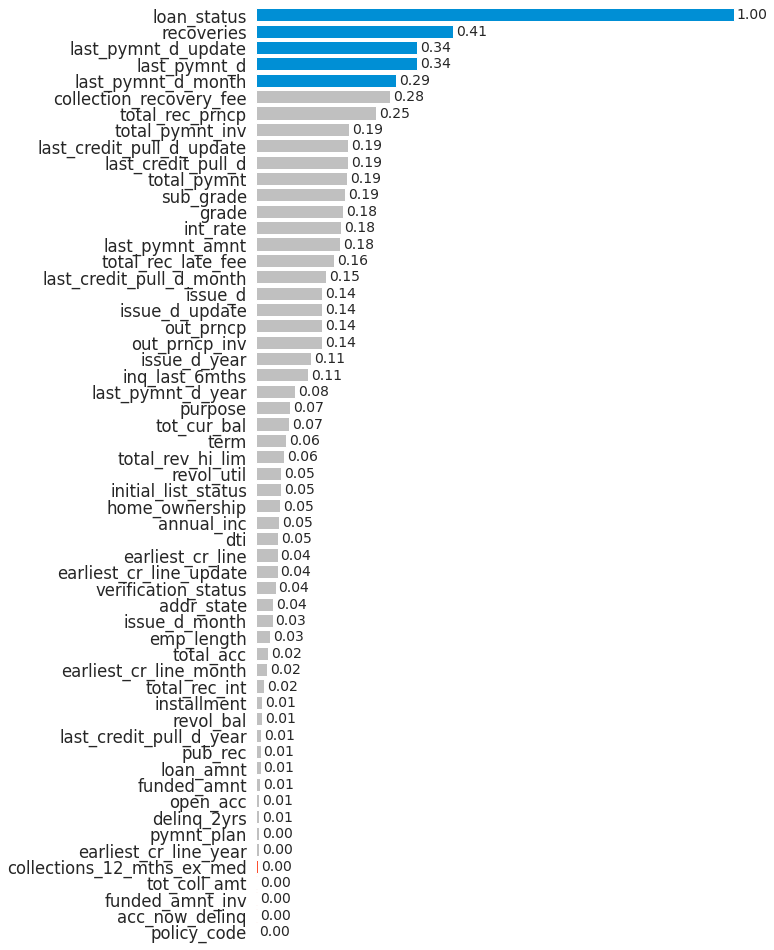

In [ ]:
# custom palette top associations
threshold_top = 5
threshold_bot = corr_target.size - threshold_top - 1
palette = []
for i in range(0, len(corr_target)):
  if i < threshold_top:
    palette.append('#008FD5') # blue
  elif i > threshold_bot:
    palette.append('#FC4F30') # red
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,16))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette, saturation=1)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
# for i, label in enumerate(ax.yaxis.get_ticklabels()):
#   if (i >= threshold_top) and (i <= threshold_bot):
#     label.set_color('silver')

# custom bar label visibility
# for con in ax.containers:
#   # labels = [val for val in con.datavalues]
#   labels = con.datavalues
#   labels_len = len(labels)

#   # masking the top 3 an bottom 3
#   np.put(labels, np.arange(3,labels_len-3), [-1])
  
#   # hide the labels for non-top 3 and non-bottom 3
#   labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

#   ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

plt.show()

Surprisingly, the loan amount have a very low association with the target variable. 
<br><br>
And there are some features that have very low associations ('almost' zero) with the target variable. I will just drop it.

In [ ]:
column_low_assc = ['pymnt_plan', 'collections_12_mths_ex_med',
                   'tot_coll_amt', 'acc_now_delinq', 'policy_code']

data_viz.drop(columns=column_low_assc, inplace=True)

### Multicollinearity

In [ ]:
column_numerical = data_viz.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_viz.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data_viz,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/dython/nominal.py:270: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  RuntimeWarning)


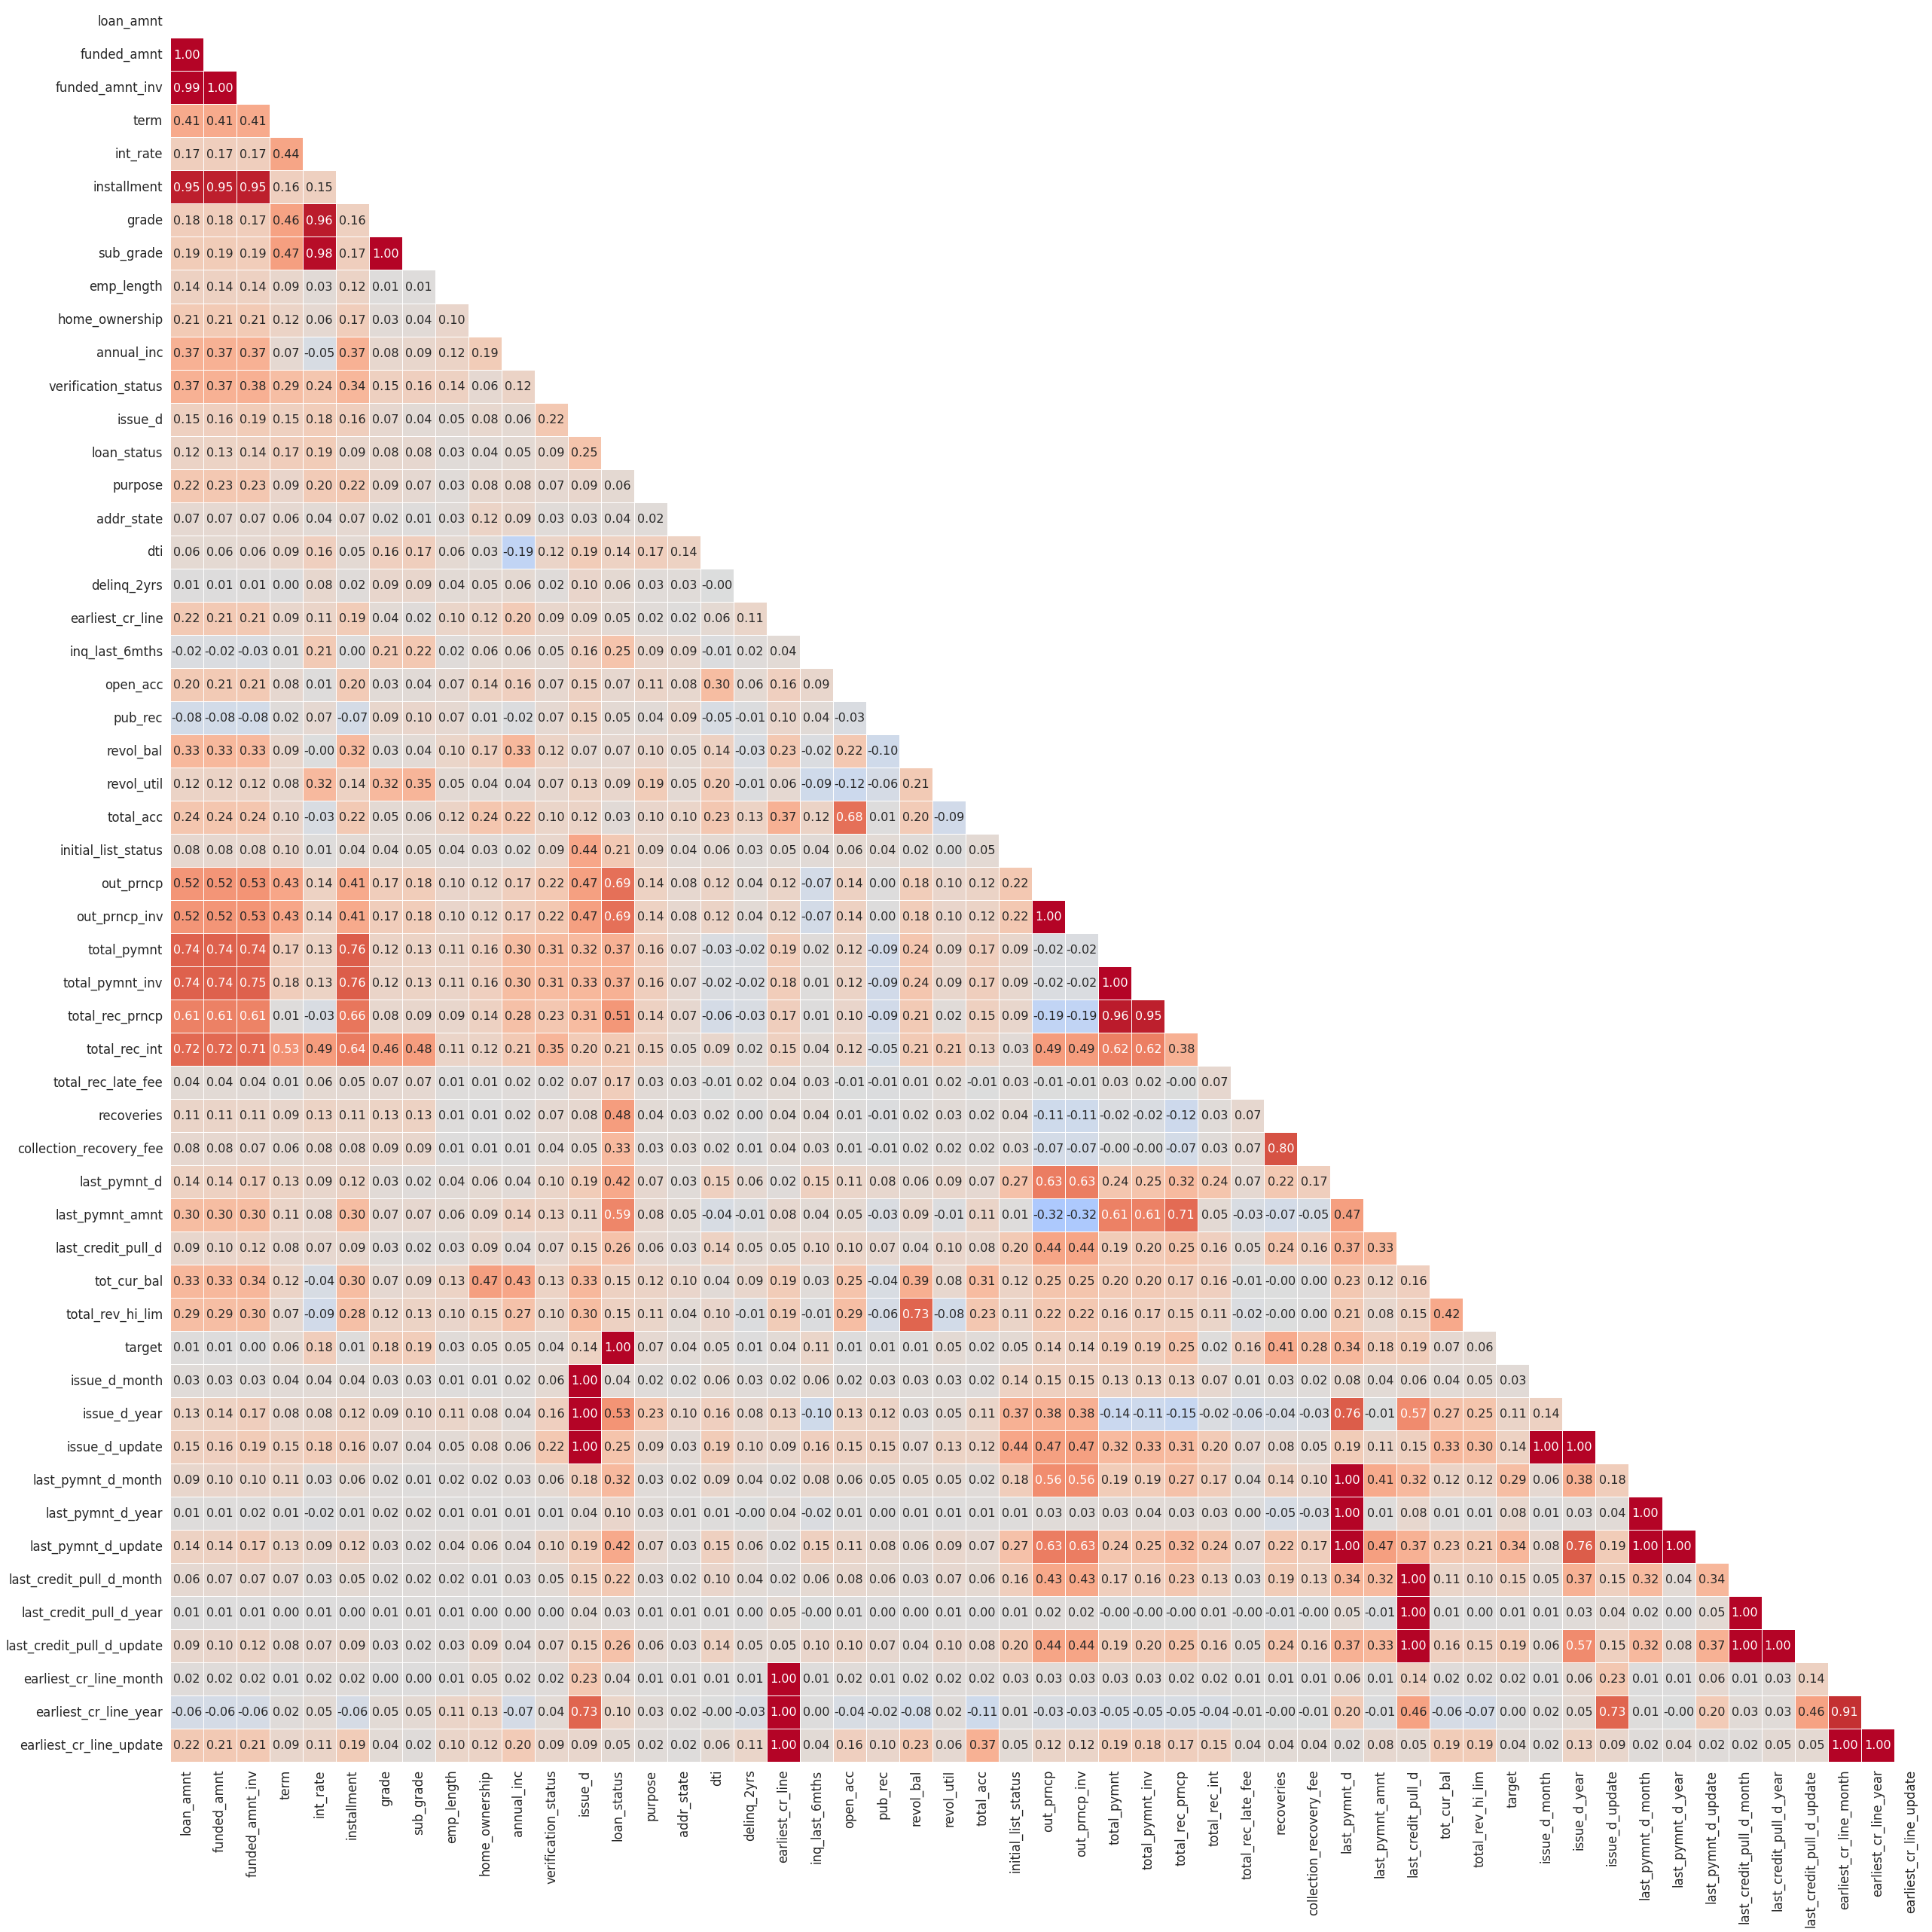

In [ ]:
mask = np.triu(np.ones_like(corr_all, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_all, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, fmt='.2f', ax=ax)

plt.show()

At glance, there are some multicollinearity. To check multicollinearity, we can use Variance Inflation Factor (VIF). But, I will not do it now.
<br><br>
There are two simple and commonly used ways to correct multicollinearity, as listed below:
- The first one is to remove one (or more) of the highly correlated variables. Since the information provided by the variables is redundant, the coefficient of determination will not be greatly impaired by the removal.
- The second method is to use principal components analysis (PCA) or partial least square regression (PLS) instead of OLS regression. PLS regression can reduce the variables to a smaller set with no correlation among them. In PCA, new uncorrelated variables are created. It minimizes information loss and improves the predictability of a model.
<br>

[Source](https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/)

### Handling Multicollinearity

For now, I will just drop some features (independent variables) that are highly correlated to each other. My strategy is, to find the features that have multicollinearity, then drop the features that have the lowest associations to the target variable.
<br><br>
I'm not calculating the VIF because I haven't encoded the categorical features. I will recheck the multicollinearity later.

In [ ]:
column_corr = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
               'grade', 'int_rate',
               'out_prncp_inv', 
               'total_pymnt', 'total_pymnt_inv',
               'collection_recovery_fee']

data_viz.drop(columns=column_corr, inplace=True)

In [ ]:
# update column list
column_numerical = data_viz.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_viz.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data_viz,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/dython/nominal.py:270: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  RuntimeWarning)


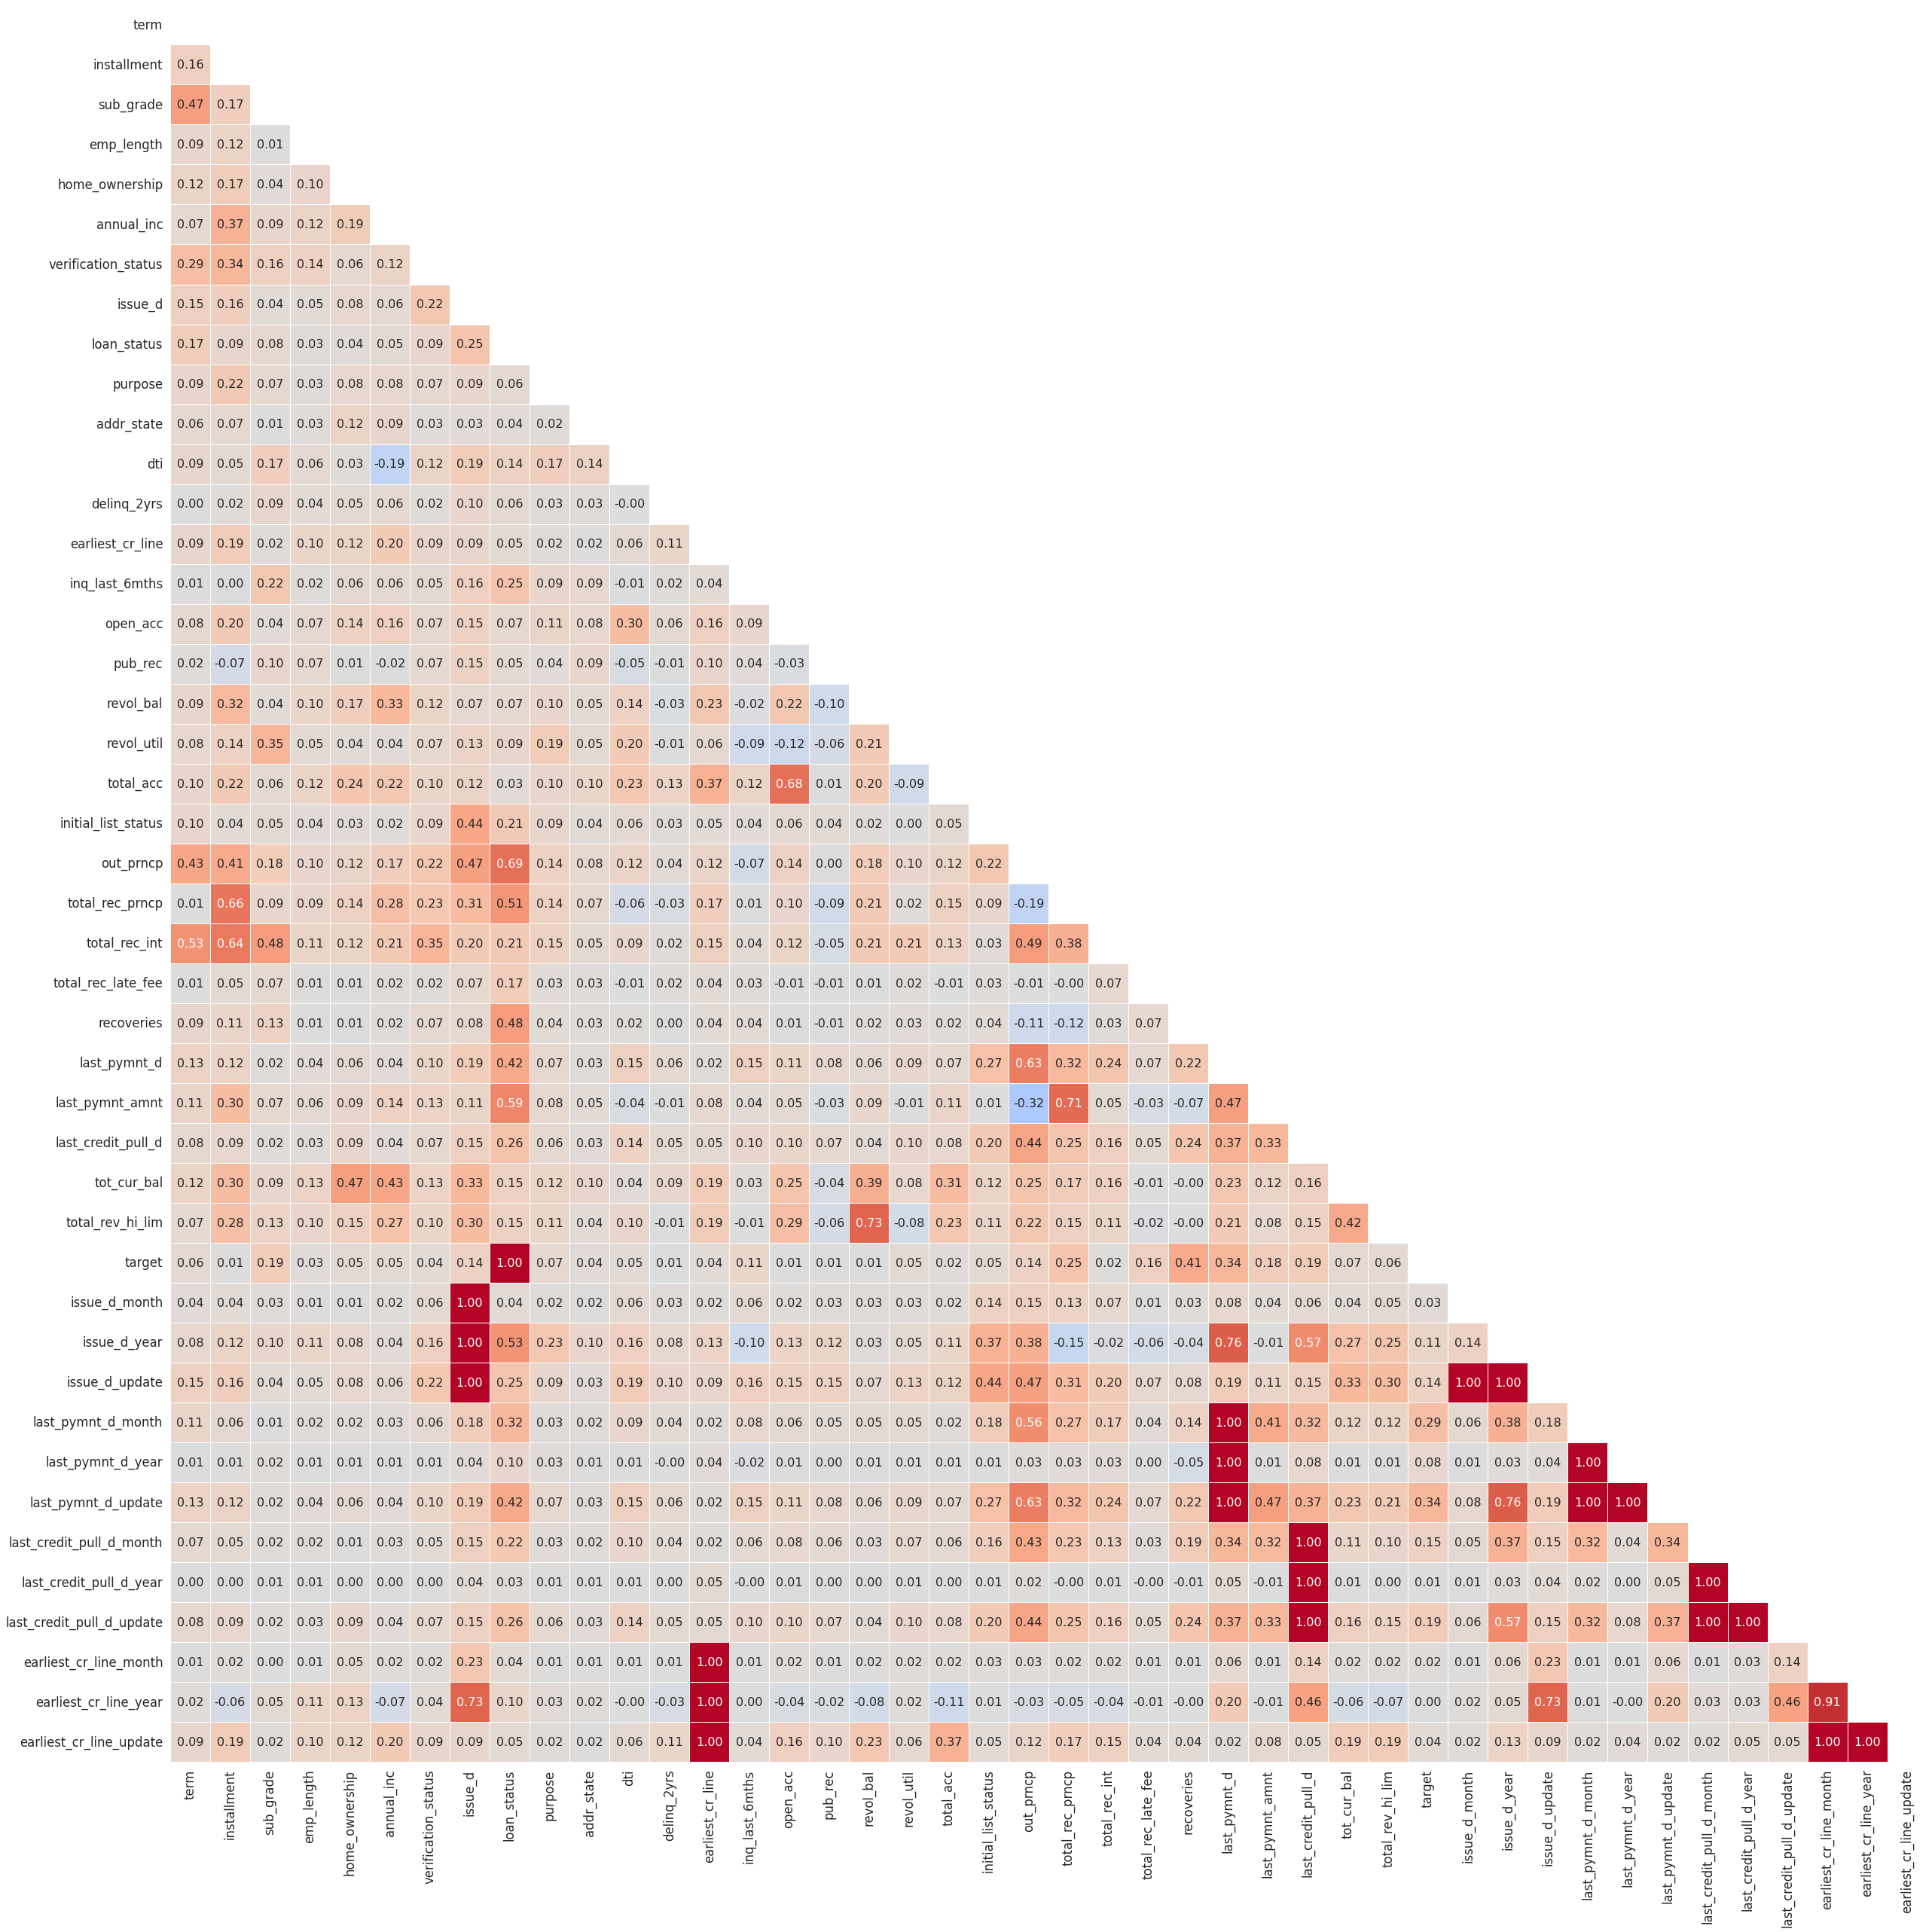

In [ ]:
mask = np.triu(np.ones_like(corr_all, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_all, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, fmt='.2f', ax=ax)

plt.show()

Now, the independent variables are less correlated.
<br><br>
Note: Just ignore the `loan_status` and `target`, since it has the same meaning so it must have a high association. And ignore the date features. I haven't dropped it yet. I will also drop the date features except those with year values.

In [ ]:
data_viz.drop(columns=['loan_status'], inplace=True)

In [ ]:
column_date = ['issue_d', 'issue_d_month', 'issue_d_update', 
               'last_pymnt_d', 'last_pymnt_d_month', 'last_pymnt_d_update',
               'last_credit_pull_d', 'last_credit_pull_d_month', 'last_credit_pull_d_update',
               'earliest_cr_line', 'earliest_cr_line_month', 'earliest_cr_line_update']

data_viz.drop(columns=column_date, inplace=True)

In [ ]:
# update column list
column_numerical = data_viz.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_viz.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data_viz,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

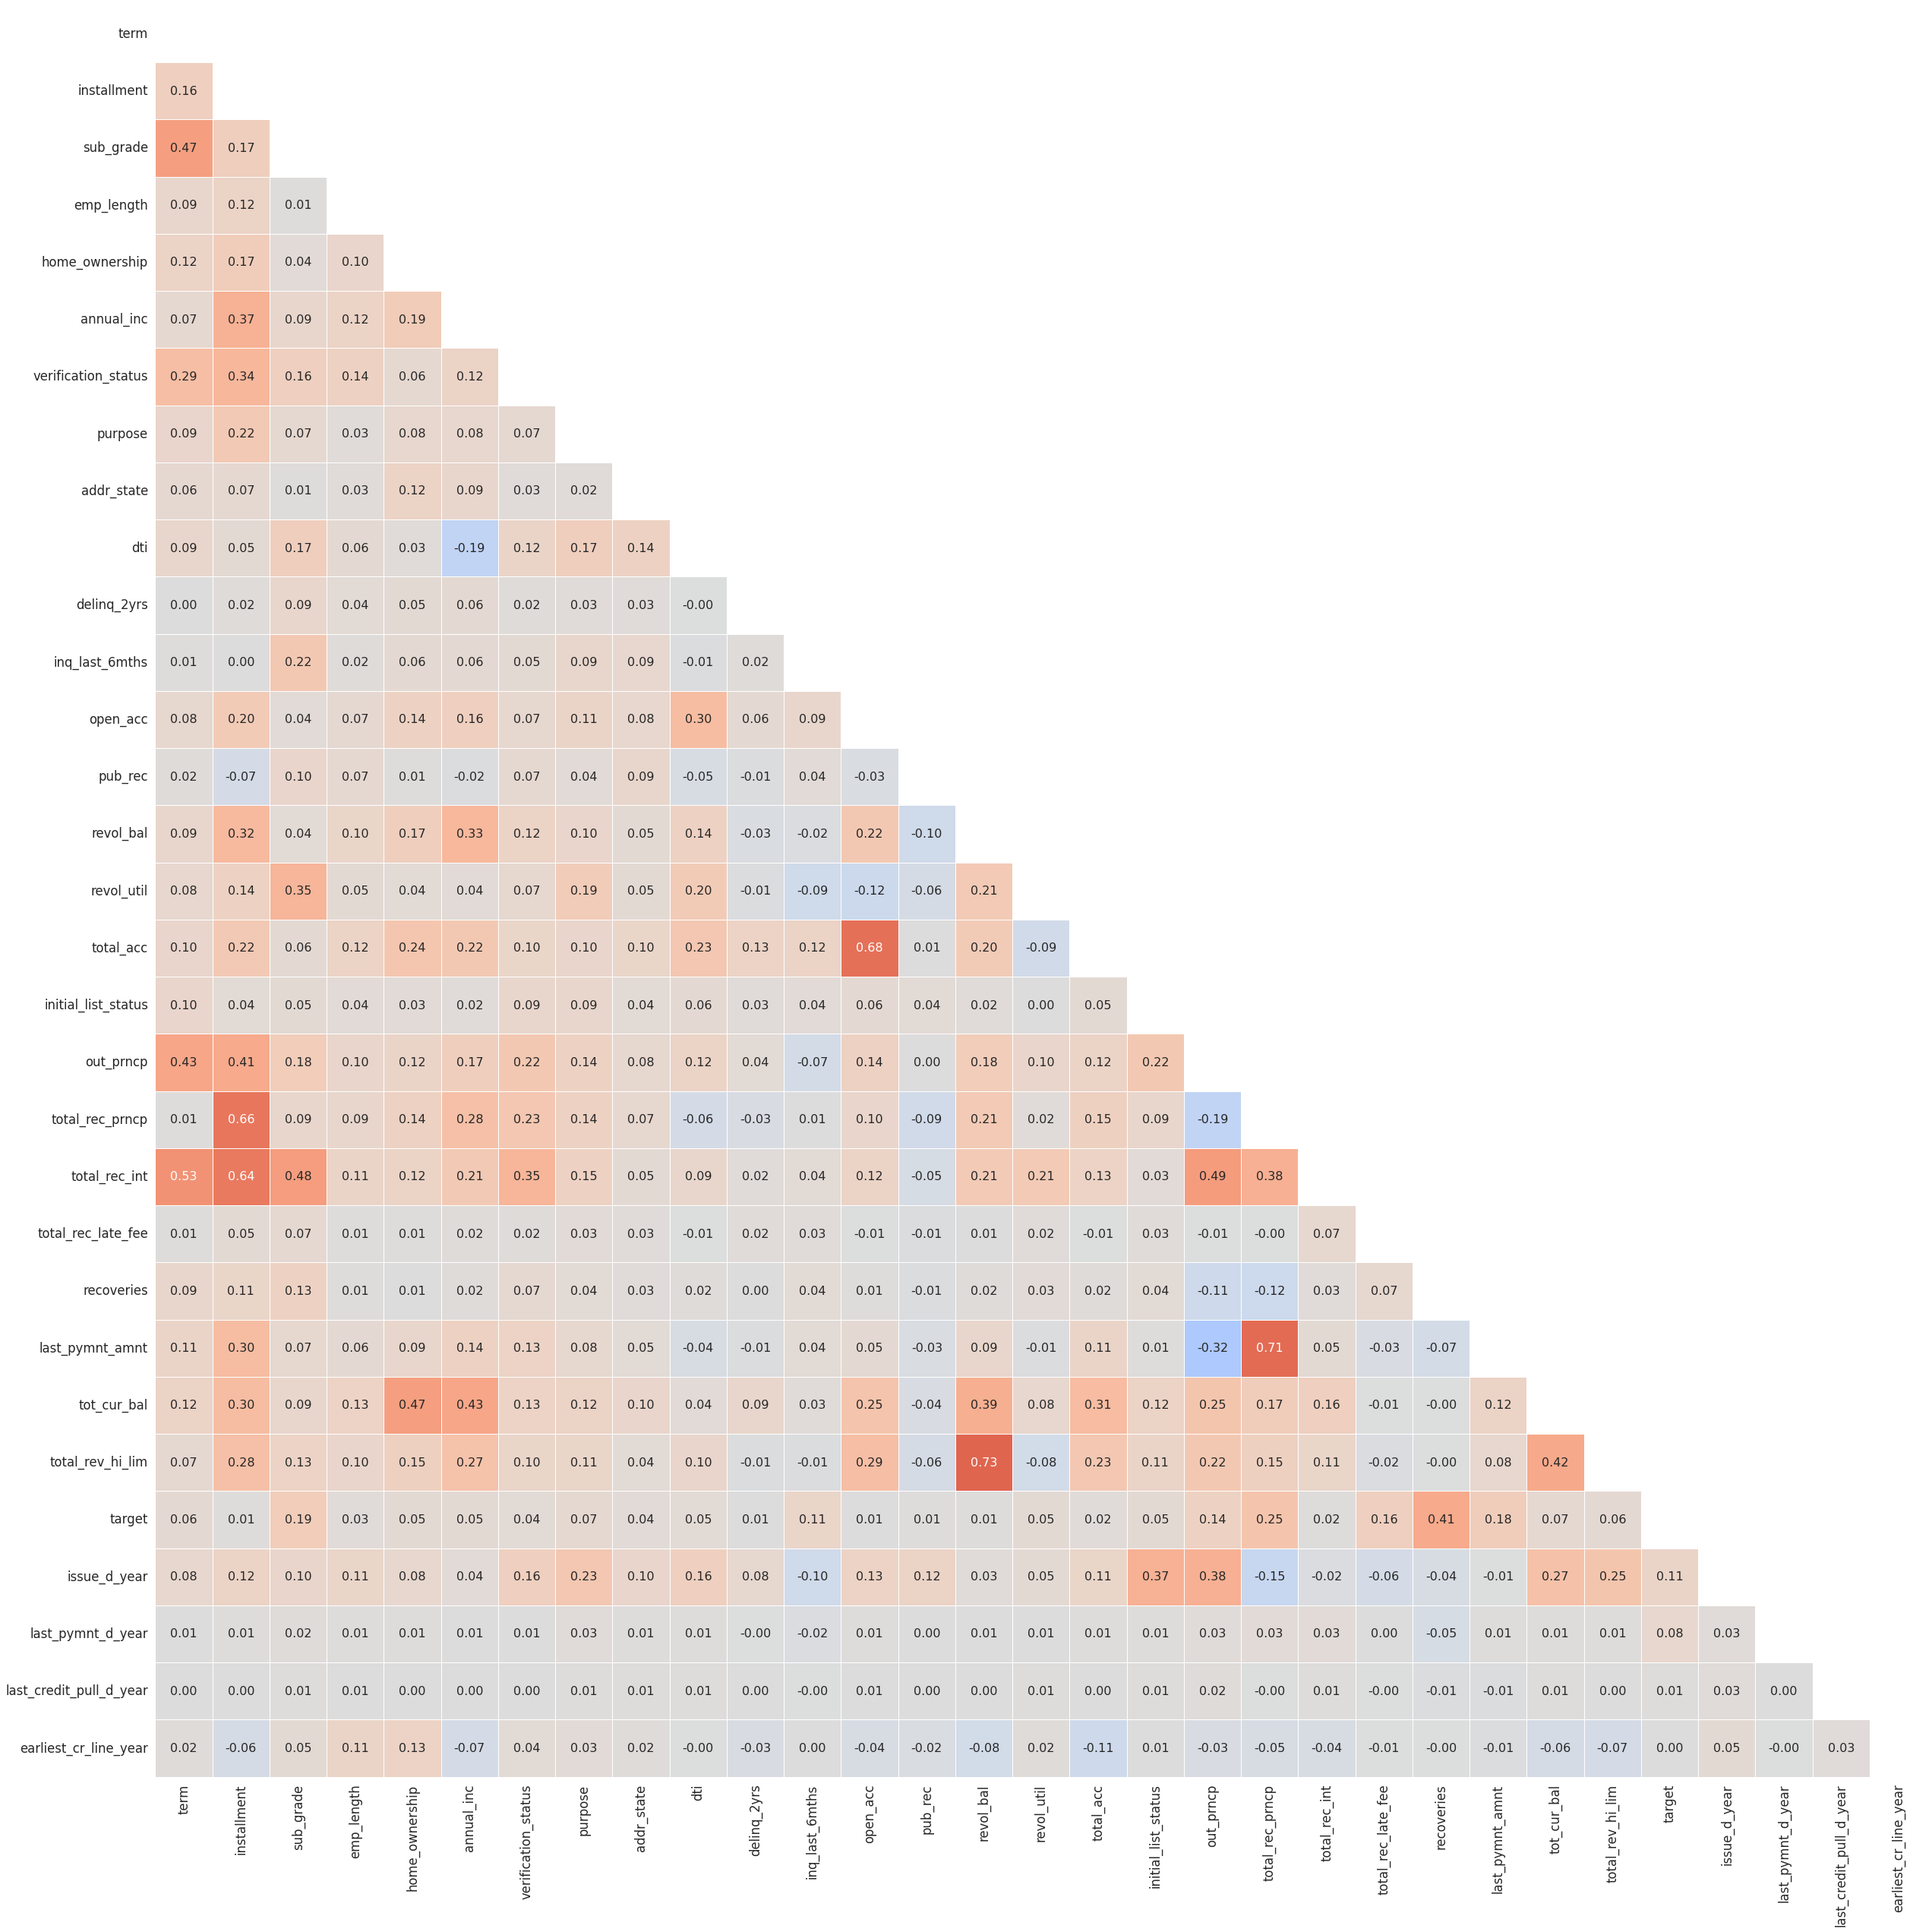

In [ ]:
mask = np.triu(np.ones_like(corr_all, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_all, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, fmt='.2f', ax=ax)

plt.show()

In [ ]:
# update column list
column_numerical = data_viz.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_viz.select_dtypes(exclude=np.number).columns.values.tolist()

column_numerical

['installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_amnt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'issue_d_year',
 'last_pymnt_d_year',
 'last_credit_pull_d_year',
 'earliest_cr_line_year']

In [ ]:
# # Import library for VIF
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)

# X = df.iloc[:,:-1]
# calc_vif(X)

## Skewness & Kurtosis

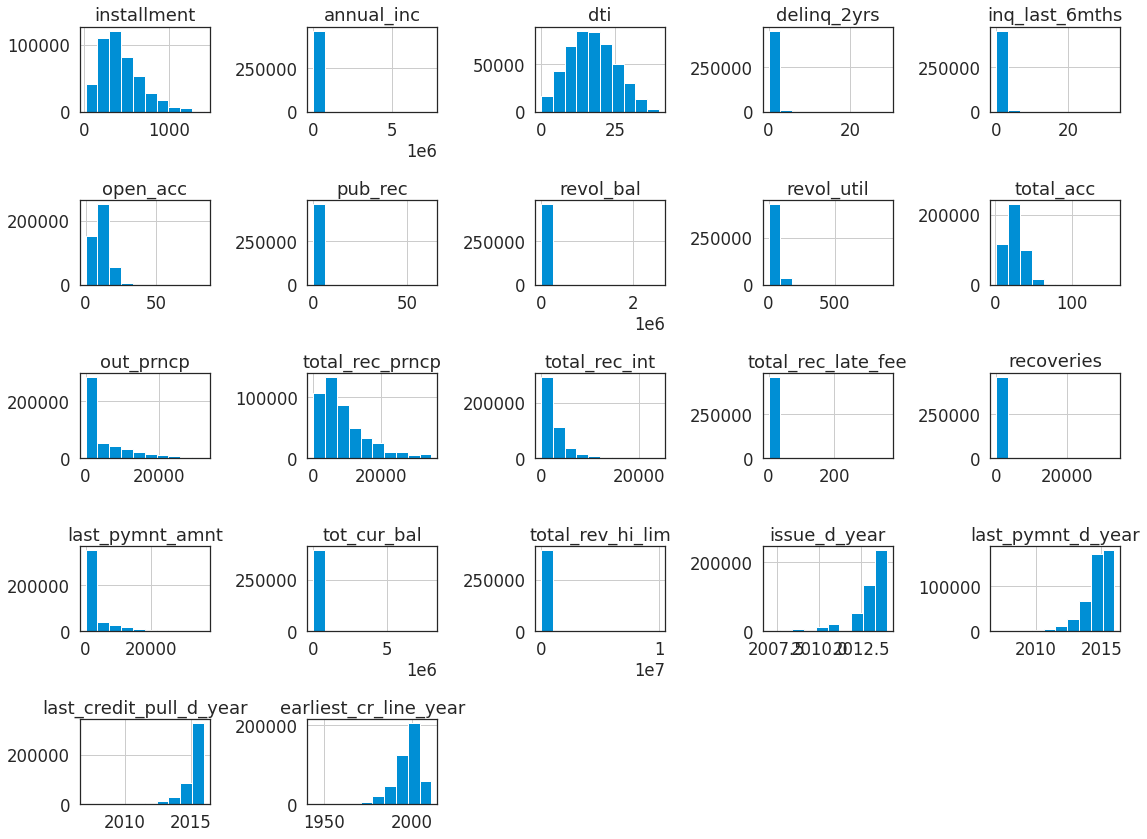

In [ ]:
data_viz[column_numerical].hist(figsize=(16,12))

plt.tight_layout()
plt.show()

At glance, we can see that there are some features that are very skewed.

### Interpreting Skewness

The rule of thumb for interpreting the skewness values:
- If skewness is less than −1 or greater than +1, the distribution can be called highly skewed.
- If skewness is between −1 and −½ or between +½ and +1, the distribution can be called moderately skewed.
- If skewness is between −½ and +½, the distribution can be called approximately symmetric.
<br>

[Source](https://brownmath.com/stat/shape.htm#SkewnessInterpret)

In [229]:
data_viz[column_numerical].skew().sort_values(ascending=False)

total_rev_hi_lim           100.586
annual_inc                  29.569
revol_bal                   19.476
pub_rec                     14.941
total_rec_late_fee          13.843
recoveries                  13.150
delinq_2yrs                  5.346
tot_cur_bal                  3.048
last_pymnt_amnt              2.561
total_rec_int                2.268
inq_last_6mths               2.142
out_prncp                    1.590
total_rec_prncp              1.446
open_acc                     1.166
installment                  0.949
total_acc                    0.813
dti                          0.188
revol_util                  -0.161
earliest_cr_line_year       -1.068
last_pymnt_d_year           -1.667
issue_d_year                -1.798
last_credit_pull_d_year     -2.689
dtype: float64

Almost all of the numerical features are skewed!

### Interpreting Kurtosis

- A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
- A distribution with kurtosis \<3 (excess kurtosis \<0) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
- A distribution with kurtosis \>3 (excess kurtosis \>0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.
<br>

[Source](https://brownmath.com/stat/shape.htm#Kurtosis)

In [230]:
data_viz[column_numerical].kurtosis().sort_values(ascending=False)

total_rev_hi_lim           26001.493
annual_inc                  3071.114
revol_bal                   1433.063
pub_rec                     1116.391
recoveries                   330.049
total_rec_late_fee           329.075
delinq_2yrs                   53.144
tot_cur_bal                   39.777
inq_last_6mths                13.864
last_credit_pull_d_year        9.214
total_rec_int                  7.159
last_pymnt_amnt                6.931
last_pymnt_d_year              3.742
issue_d_year                   3.666
open_acc                       2.817
revol_util                     2.692
total_rec_prncp                2.042
out_prncp                      1.957
earliest_cr_line_year          1.634
total_acc                      0.934
installment                    0.768
dti                           -0.541
dtype: float64

There are some features that have kurotsis value more or less than 3.

### Handling Skewness

There are some methods that can be used to handle skewness, such as:
- 

### Fisher's Transform

skew: 29.56890537672224
kurtosis: 3071.114369880593


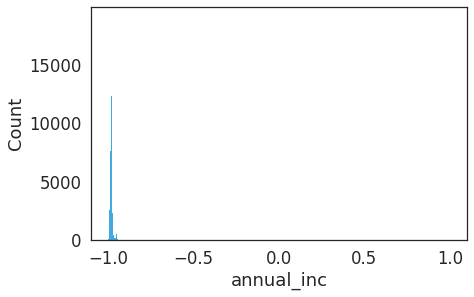

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data_tmp = data_viz.copy()
col = 'annual_inc'

threshold = 1e-4
mms = MinMaxScaler(feature_range=(-1+threshold, 1-threshold))
# mms = StandardScaler()

data_tmp[col] = mms.fit_transform(data_tmp[col].values.reshape(-1,1))

sns.histplot(data_tmp[col])

print('skew:', data_tmp[col].skew())
print('kurtosis:', data_tmp[col].kurtosis())

skew: 0.20505393812535005
kurtosis: 2.638789164839966


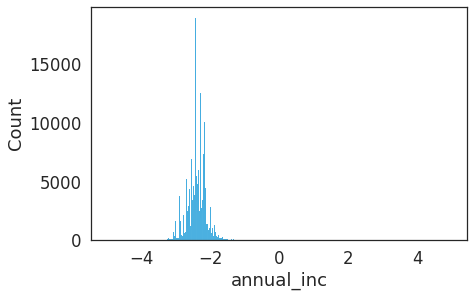

In [ ]:
data_tmp[col] = np.arctanh(data_tmp[col])

sns.histplot(data_tmp[col])

print('skew:', data_tmp[col].skew())
print('kurtosis:', data_tmp[col].kurtosis())

Patokan:
- skewness kurang dari 0.5 atau -0.5
- kurtosis mendekati 3

In [ ]:
data_tmp[col].describe()

count    466281.000
mean         -2.365
std           0.256
min          -3.800
25%          -2.535
50%          -2.371
75%          -2.201
max           3.800
Name: annual_inc, dtype: float64

<AxesSubplot:ylabel='Count'>

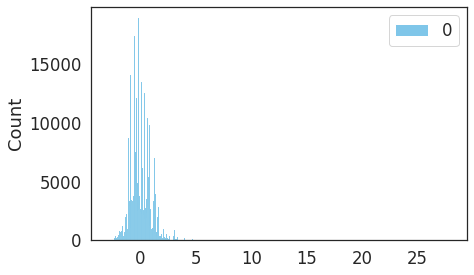

In [ ]:
ss = StandardScaler()

sns.histplot(ss.fit_transform(data_tmp[col].values.reshape(-1,1)))

### Power Transform

skew: -0.0764019747211436
kurtosis: -0.49995767290853177


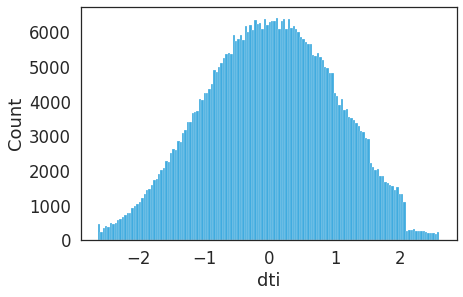

In [ ]:
from sklearn.preprocessing import PowerTransformer

data_tmp = data_viz.copy()
col = 'dti'

pt = PowerTransformer(method='yeo-johnson')
data_tmp[col] = pt.fit_transform(data_tmp[col].values.reshape(-1,1))

sns.histplot(data_tmp[col])

print('skew:', data_tmp[col].skew())
print('kurtosis:', data_tmp[col].kurtosis())

skew: -0.013710891825869749
kurtosis: -0.18759728535867115


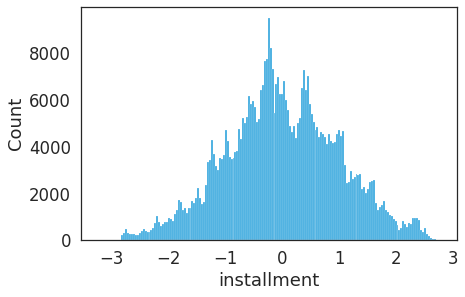

In [ ]:
from sklearn.preprocessing import PowerTransformer

data_tmp = data_viz.copy()
col = 'installment'

pt = PowerTransformer(method='box-cox')
data_tmp[col] = pt.fit_transform(data_tmp[col].values.reshape(-1,1))

sns.histplot(data_tmp[col])

print('skew:', data_tmp[col].skew())
print('kurtosis:', data_tmp[col].kurtosis())

### Log Transform

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


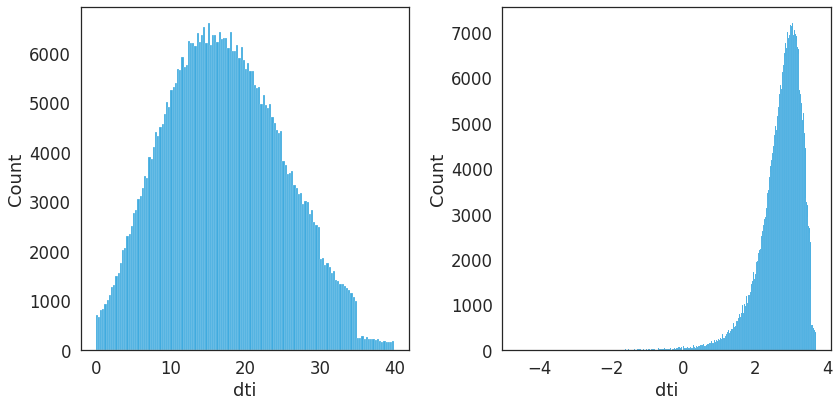

In [ ]:
_, ax = plt.subplots(1,2,figsize=(12,6))

sns.histplot(data_viz['dti'], ax=ax[0])
sns.histplot(np.log(data_viz['dti']), ax=ax[1])

plt.tight_layout()
plt.show()

### BoxCox

In [ ]:
from scipy import stats

# tmp_np = stats.boxcox(data_viz['total_acc'].apply(lambda x: x+1))[0]
tmp_np = stats.boxcox(data_viz['installment'])[0]
tmp_sr = pd.Series(tmp_np)

tmp_sr.skew()

-0.013710891825867969

<AxesSubplot:ylabel='Count'>

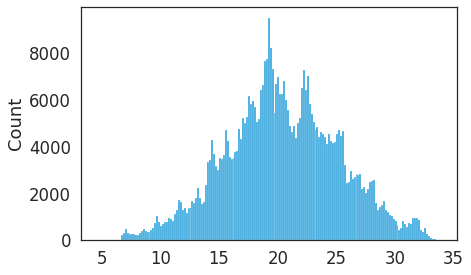

In [ ]:
sns.histplot(tmp_sr)

In [ ]:
data_viz['installment'].skew()

0.9492934119828836

# Reference and Further Reading
- LendingClub. "What do the different Note statuses mean?" ([source](https://help.lendingclub.com/hc/en-us/articles/216109367-What-do-the-different-Note-statuses-mean-))
- Corporate Finance Institute. "Variance Inflation Factor (VIF)" ([source](https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/))
- Analytics Vidhya. "What is Multicollinearity? Here’s Everything You Need to Know" ([source](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/))
- ResidentMario. "missingno documentation" ([source](https://github.com/ResidentMario/missingno))
- stochazesthai. "Fisher Transformation" ([source](https://stats.stackexchange.com/questions/155429/how-to-transform-negative-values-to-logarithms))
- GeeksforGeeks. "atanh() function in C++ STL" ([source](https://www.geeksforgeeks.org/atanh-function-in-c-stl/))
- Atul Sharma. "Skewness & Kurtosis Simplified" ([source](https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85))
- BrownMath. "Measures of Shape: Skewness and Kurtosis" ([source](https://brownmath.com/stat/shape.htm))